In [1]:
import logging
import sys
import os
%cd ..
from bds.meel import approx_mc2, approx_mc2_core
from bds.rule import Rule
from bds.utils import bin_random , bin_array, randints, solutions_to_dict

#from bds.bb import BranchAndBoundNaive, BranchAndBoundV1, BranchAndBoundV0, BranchAndBoundV2
from logzero import logger
import gmpy2 as gmp
from gmpy2 import mpz , mpfr
from bds.sat.min_freq import construct_min_freq_program
from bds.sat.solver import construct_solver
from bds.gf2 import GF
from bds.rule import Rule
from bds.utils import mpz_set_bits
from tests.utils import assert_dict_allclose, assert_close_mpfr

#from bds.bounds_utils import find_equivalence_classes
import numpy as np 

from bds.cbb_v2 import * 

logger.setLevel(logging.DEBUG)

num_pts = 500

show_progres = True
rand_seed = 1234

/u/50/ciaperm1/unix/sampling-rashomon-decision-set-code


In [ ]:
from time import time

#num_rules_list = reversed([25, 50, 75, 100, 200])
ub = 0.7
lmbd = 0.1
res_rows = []
all_times_naive = []
all_times_V1 = [] 
all_times_V0 = [] 

for num_rules in [5]:
    
    rules = [Rule.random(i+1, num_pts) for i in range(num_rules)]
    y = bin_random(num_pts)
    
    start_time = time() 
    bbNaive = BranchAndBoundNaive(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbNaive.run(return_objective=True))
    all_times_naive.append(time() - start_time) 
    actualNaive = solutions_to_dict(feasible_solutions)
    
    
    start_time = time() 
    bbV0 = BranchAndBoundV0(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV0.run(return_objective=True))
    all_times_V0.append(time() - start_time)
    actual_V0 = solutions_to_dict(feasible_solutions)

    
    
    start_time = time() 
    bbV1 = BranchAndBoundV1(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV1.run(return_objective=True))
    all_times_V1.append(time() - start_time)
    actual_V1 = solutions_to_dict(feasible_solutions)
    

In [ ]:
os.chdir("/u/50/ciaperm1/unix/Desktop/sampling-rashomon-decision-set-code")

In [ ]:
import matplotlib.pyplot as plt 

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# plot 
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
plt.plot([10, 25, 40], all_times_naive, label="HLB", marker = "o", linewidth=1.5 , color = colors[0], markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V0, label="RSSB", marker = "^",  linewidth=1.5 ,  color = colors[1],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V1, label="RSSB + EPLB", marker = "s", linewidth=1.5 ,  color = colors[2],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.yscale("log") 
plt.title("RSSB VS HLB VS RSSB + EPLB") 
plt.xlabel("# Rules")
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/log_first_comparison_bounds" + ".pdf")
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
plt.plot([10, 25, 40], all_times_naive, label="HLB", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V0, label="RSSB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V1, label="RSSB + EPLB",  marker = "s", linewidth=1.5 ,  color = colors[2],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.title("RSSB VS HLB VS RSSB + EPLB") 
plt.xlabel("# Rules")
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/first_comparison_bounds" + ".pdf" )
plt.show()

#### Check same results 

In [ ]:
from time import time

#num_rules_list = reversed([25, 50, 75, 100, 200])
ub = 0.7
lmbd = 0.1
res_rows = []
all_times_naive = []
all_times_V1 = [] 
all_times_V0 = [] 

for num_rules in [10]:
    
    rules = [Rule.random(i+1, num_pts) for i in range(num_rules)]
    y = bin_random(num_pts)
    
    start_time = time() 
    bbNaive = BranchAndBoundNaive(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbNaive.run(return_objective=True))
    all_times_naive.append(time() - start_time) 
    actualNaive = solutions_to_dict(feasible_solutions)
    
    
    start_time = time() 
    bbV0 = BranchAndBoundV0(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV0.run(return_objective=True))
    all_times_V0.append(time() - start_time)
    actual_V0 = solutions_to_dict(feasible_solutions)
    
    assert_dict_allclose(actualNaive, actual_V0)
    
    start_time = time() 
    bbV1 = BranchAndBoundV1(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV1.run(return_objective=True))
    all_times_V1.append(time() - start_time)
    actual_V1 = solutions_to_dict(feasible_solutions)
    
    assert_dict_allclose(actualNaive, actual_V1)

In [ ]:
actualNaive


### try real world data 

In [2]:
from sklearn import datasets 

In [3]:
import pandas as pd

In [4]:
# Load the CSV file using Pandas
data = pd.read_csv('data/compas_test-binary.csv')

# Print the data
data.head()

,sex:Male,age:18-20,age:21-22,age:23-25,age:26-45,age:>45,juvenile-felonies:>0,juvenile-misdemeanors:>0,juvenile-crimes:>0,priors:2-3,priors:=0,priors:=1,priors:>3,current-charge-degree:Misdemeanor,recidivate-within-two-years:1
0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1
2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [5]:
data.shape

(721, 15)

In [6]:
X = data.to_numpy()

In [7]:
X.shape

(721, 15)

In [8]:
# read labels 
f = open("data/compas_test.label", "r")
labels = []
for row in f.readlines(): 
    labels.append(list(map(int, row.split(" ")[1:])))

In [9]:
y = np.array(labels[1], dtype = bool) 

In [10]:
assert len(y) == X.shape[0]

In [11]:
# now we need to extract rules 
X_bag = [set([j for j, x in enumerate(row) if x]) for row in X]

In [12]:
from bds.fpgrowth import preprocess_transaction_list, build_fptree, fpgrowth_on_tree

In [13]:
lmbd = 0.1
min_support = lmbd * X.shape[0] / 2

In [14]:
ordered_input_data = preprocess_transaction_list(
    X_bag, min_support
)
tree = build_fptree(ordered_input_data)
frequent_itemsets = set(fpgrowth_on_tree(tree, set(), min_support))

In [15]:
len(frequent_itemsets)

83

In [16]:
from bds.rule import Rule
from time import time

def compute_truthtable(X,itemset): 
    ''' poorly optimized function '''
    support_list = [] 
    for i in range(X.shape[0]): 
        if sum([X[i][j] for j in itemset]) == len(itemset): 
            support_list.append(i)
                
    truthtable = mpz_set_bits(mpz(), support_list)
    
    return truthtable
    

In [17]:
# Now create rules 
rules = [] 
for i,itemset in enumerate(frequent_itemsets):
    tt = compute_truthtable(X,itemset)
    this_Rule = Rule(id = i+1, name = "rule_" + str(i), cardinality=len(itemset), truthtable=tt)
    # we need the truthtable for this itemset 
    rules.append(this_Rule) 
    

In [18]:
import pickle 
pickle.dump(rules, open("rules_compas_" + str(len(rules)), "wb" ))

In [19]:
from bds.cbb_v2 import (
    ConstrainedBranchAndBound,
    count_added_pivots,
    ensure_no_violation,
    ensure_satisfiability,
)

In [20]:
lmbd = 0.1
ub = 0.4 
cbb = ConstrainedBranchAndBoundNaive(rules, ub, y, lmbd)
cbb_v2 = ConstrainedBranchAndBound(rules, ub, y, lmbd)

[D 230620 19:04:24 bb:53] calling ConstrainedBranchAndBoundNaive with ub=0.4, lmbd=0.1
[D 230620 19:04:24 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1


In [21]:
import time 

In [36]:
ordered_input_data = preprocess_transaction_list(
    X_bag, min_support
)
tree = build_fptree(ordered_input_data)

all_times_naive = [] 
all_times = [] 
all_times_approx_mc2= []

eps = 0.75
delta = 0.75

for min_support in [30, 40 , 50, 60]:  
    
    
    #print("min support " + str(min_support)) 
    #print("tree " + str(tree))

    frequent_itemsets = set(fpgrowth_on_tree(tree, set(), min_support))
    # Now create rules 
    rules = [] 
    for i,itemset in enumerate(frequent_itemsets):
        tt = compute_truthtable(X,itemset)
        this_Rule = Rule(id = i+1, name = "rule_" + str(i), cardinality=len(itemset), truthtable=tt)
        # we need the truthtable for this itemset 
        rules.append(this_Rule) 
    
    #    
    #
    
    print(len(rules))
    
    pickle.dump(rules, open("rules_compas_" + str(len(rules)), "wb" ))

    lmbd = 0.1
    ub = 0.4 
    cbb = ConstrainedBranchAndBoundNaive(rules, ub, y, lmbd)
    cbb_v2 = ConstrainedBranchAndBound(rules, ub, y, lmbd)
    
    #
    #
    
    rand_seed = 12
    num_constraints = 5
    num_rules = len(rules)
    
    from bds.random_hash import generate_h_and_alpha
    A, t = generate_h_and_alpha(
    num_rules, num_constraints, rand_seed, as_numpy=True
    )
    
    start_time = time.time() 
    actual_sols = solutions_to_dict(
    list(cbb_v2.run(return_objective=True, A=A, t=t)))
    all_times.append(time.time() - start_time)
    
    
    start_time = time.time() 
    actual_sols = solutions_to_dict(
    list(cbb.run(return_objective=True, A=A, t=t)))
    all_times_naive.append(time.time() - start_time)
    
    
    thresh = 72
    prev_m = 1
    start_time = time.time() 
    est = approx_mc2( rules =  rules,
    y=y,
    lmbd = lmbd,
    ub = ub,
    delta =delta,
    eps =  eps)
    all_times_approx_mc2.append(time.time() - start_time)
    


[D 230620 19:31:40 bb:53] calling ConstrainedBranchAndBoundNaive with ub=0.4, lmbd=0.1
[D 230620 19:31:40 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:31:40 cbb:160] setting up the parity constraint system
[D 230620 19:31:40 cbb:129] simplifying A x = t using rref
[D 230620 19:31:40 cbb:136] density(A_rref) = 49.388% (from 52.2%)


98


[D 230620 19:31:41 cbb:160] setting up the parity constraint system
[D 230620 19:31:41 cbb:129] simplifying A x = t using rref
[D 230620 19:31:41 cbb:136] density(A_rref) = 49.388% (from 52.2%)
[D 230620 19:31:42 meel:358] calling approx_mc2 with eps = 0.75 and delta=0.75
[D 230620 19:31:42 meel:361] thresh = 77.53
[D 230620 19:31:42 bb:53] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1
[D 230620 19:31:42 meel:372] BB solving (thresh=77) takes 0.00 secs
    and gave 77 solutions
[D 230620 19:31:42 meel:384] maximum number of calls to ApproxMC2Core: 34
  0%|                                                                | 0/34 [00:00<?, ?it/s][D 230620 19:31:42 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:31:42 meel:277] initial solving under 97 constraints
[D 230620 19:31:42 cbb:160] setting up the parity constraint system
[D 230620 19:31:42 cbb:129] simplifying A x = t using rref
[D 230620 19:31:42 cbb:136] density(A_rref) = 1.525% (from 49.9%)
[D 230

time_cost_info: [(1, 0.05060608498752117), (2, 0.06579089298611507), (3, 0.11327819700818509), (4, 0.13112686504609883), (8, 0.7786615089862607), (6, 0.41407288500340655), (7, 0.6136270759743638)]


[D 230620 19:31:44 meel:150] search tree size: 3381
[D 230620 19:31:44 meel:151] number of prefix evaluations: 8991
[D 230620 19:31:44 meel:153] solving takes 0.10 secs
[D 230620 19:31:44 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:44 meel:138] ---- solve m = 4----
[D 230620 19:31:44 cbb:160] setting up the parity constraint system
[D 230620 19:31:44 cbb:129] simplifying A x = t using rref
[D 230620 19:31:44 cbb:136] density(A_rref) = 52.296% (from 46.9%)
[D 230620 19:31:45 meel:150] search tree size: 6153
[D 230620 19:31:45 meel:151] number of prefix evaluations: 21658
[D 230620 19:31:45 meel:153] solving takes 0.42 secs
[D 230620 19:31:45 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:45 meel:138] ---- solve m = 8----
[D 230620 19:31:45 cbb:160] setting up the parity constraint system
[D 230620 19:31:45 cbb:129] simplifying A x = t using rref
[D 230620 19:31:45 cbb:136] density(A_rref) = 45.663% (from 47.8%)
[D 230620 19:31:45 meel:150] search tree size: 8224
[D 230620 19:

time_cost_info: [(1, 0.04037780000362545), (2, 0.08108044700929895), (3, 0.09906179900281131), (4, 0.42474220000440255), (8, 0.625996038026642), (6, 0.3005356049980037), (7, 0.6845616909558885)]


[D 230620 19:31:47 meel:150] search tree size: 5871
[D 230620 19:31:47 meel:151] number of prefix evaluations: 18663
[D 230620 19:31:47 meel:153] solving takes 0.44 secs
[D 230620 19:31:47 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:47 meel:138] ---- solve m = 8----
[D 230620 19:31:47 cbb:160] setting up the parity constraint system
[D 230620 19:31:47 cbb:129] simplifying A x = t using rref
[D 230620 19:31:47 cbb:136] density(A_rref) = 48.469% (from 54.3%)
[D 230620 19:31:47 meel:150] search tree size: 8728
[D 230620 19:31:47 meel:151] number of prefix evaluations: 253121
[D 230620 19:31:47 meel:153] solving takes 0.60 secs
[D 230620 19:31:47 meel:197] |Y| < thresh (27 < 77)
[D 230620 19:31:47 meel:138] ---- solve m = 6----
[D 230620 19:31:47 cbb:160] setting up the parity constraint system
[D 230620 19:31:47 cbb:129] simplifying A x = t using rref
[D 230620 19:31:47 cbb:136] density(A_rref) = 48.980% (from 52.7%)
[D 230620 19:31:48 meel:150] search tree size: 9430
[D 230620 19:

time_cost_info: [(1, 0.0315761300153099), (2, 0.03937241801759228), (3, 0.09510915499413386), (4, 0.44232787197688594), (8, 0.5950785569730215), (6, 0.35780107096070424), (7, 0.8456405669567175)]


[D 230620 19:31:49 meel:150] search tree size: 3491
[D 230620 19:31:49 meel:151] number of prefix evaluations: 8829
[D 230620 19:31:49 meel:153] solving takes 0.11 secs
[D 230620 19:31:49 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:49 meel:138] ---- solve m = 4----
[D 230620 19:31:49 cbb:160] setting up the parity constraint system
[D 230620 19:31:49 cbb:129] simplifying A x = t using rref
[D 230620 19:31:49 cbb:136] density(A_rref) = 46.939% (from 43.6%)
[D 230620 19:31:49 meel:150] search tree size: 5419
[D 230620 19:31:49 meel:151] number of prefix evaluations: 19440
[D 230620 19:31:49 meel:153] solving takes 0.18 secs
[D 230620 19:31:49 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:49 meel:138] ---- solve m = 8----
[D 230620 19:31:49 cbb:160] setting up the parity constraint system
[D 230620 19:31:49 cbb:129] simplifying A x = t using rref
[D 230620 19:31:49 cbb:136] density(A_rref) = 44.643% (from 46.9%)
[D 230620 19:31:50 meel:150] search tree size: 9262
[D 230620 19:

time_cost_info: [(1, 0.03220655594486743), (2, 0.05987560603534803), (3, 0.10634676297195256), (4, 0.1791340180207044), (8, 0.694408974959515), (6, 0.45377043599728495), (7, 0.8906968400115147)]


[D 230620 19:31:51 meel:150] search tree size: 4589
[D 230620 19:31:51 meel:151] number of prefix evaluations: 15121
[D 230620 19:31:51 meel:153] solving takes 0.11 secs
[D 230620 19:31:51 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:51 meel:138] ---- solve m = 8----
[D 230620 19:31:51 cbb:160] setting up the parity constraint system
[D 230620 19:31:51 cbb:129] simplifying A x = t using rref
[D 230620 19:31:51 cbb:136] density(A_rref) = 48.214% (from 49.4%)
[D 230620 19:31:52 meel:150] search tree size: 8714
[D 230620 19:31:52 meel:151] number of prefix evaluations: 249569
[D 230620 19:31:52 meel:153] solving takes 0.58 secs
[D 230620 19:31:52 meel:197] |Y| < thresh (20 < 77)
[D 230620 19:31:52 meel:138] ---- solve m = 6----
[D 230620 19:31:52 cbb:160] setting up the parity constraint system
[D 230620 19:31:52 cbb:129] simplifying A x = t using rref
[D 230620 19:31:52 cbb:136] density(A_rref) = 47.279% (from 50.7%)
[D 230620 19:31:52 meel:150] search tree size: 9451
[D 230620 19:

time_cost_info: [(1, 0.03027622599620372), (2, 0.04076759301824495), (3, 0.07975931698456407), (4, 0.11333924700738862), (8, 0.5785045399679802), (6, 0.5340482189785689), (7, 0.6209513769717887)]


[D 230620 19:31:53 meel:150] search tree size: 3389
[D 230620 19:31:53 meel:151] number of prefix evaluations: 8244
[D 230620 19:31:53 meel:153] solving takes 0.11 secs
[D 230620 19:31:53 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:53 meel:138] ---- solve m = 4----
[D 230620 19:31:53 cbb:160] setting up the parity constraint system
[D 230620 19:31:53 cbb:129] simplifying A x = t using rref
[D 230620 19:31:53 cbb:136] density(A_rref) = 50.000% (from 51.5%)
[D 230620 19:31:53 meel:150] search tree size: 4370
[D 230620 19:31:53 meel:151] number of prefix evaluations: 16164
[D 230620 19:31:53 meel:153] solving takes 0.14 secs
[D 230620 19:31:53 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:53 meel:138] ---- solve m = 8----
[D 230620 19:31:53 cbb:160] setting up the parity constraint system
[D 230620 19:31:53 cbb:129] simplifying A x = t using rref
[D 230620 19:31:53 cbb:136] density(A_rref) = 42.985% (from 49.6%)
[D 230620 19:31:54 meel:150] search tree size: 9280
[D 230620 19:

time_cost_info: [(1, 0.040153121983166784), (2, 0.06603239598916844), (3, 0.11196261097211391), (4, 0.1363611519918777), (8, 0.7136680450057611), (6, 0.6468950529815629), (7, 0.744060889002867)]


[D 230620 19:31:56 meel:150] search tree size: 3250
[D 230620 19:31:56 meel:151] number of prefix evaluations: 7185
[D 230620 19:31:56 meel:153] solving takes 0.10 secs
[D 230620 19:31:56 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:56 meel:138] ---- solve m = 4----
[D 230620 19:31:56 cbb:160] setting up the parity constraint system
[D 230620 19:31:56 cbb:129] simplifying A x = t using rref
[D 230620 19:31:56 cbb:136] density(A_rref) = 49.490% (from 50.8%)
[D 230620 19:31:56 meel:150] search tree size: 5004
[D 230620 19:31:56 meel:151] number of prefix evaluations: 16513
[D 230620 19:31:56 meel:153] solving takes 0.15 secs
[D 230620 19:31:56 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:56 meel:138] ---- solve m = 8----
[D 230620 19:31:56 cbb:160] setting up the parity constraint system
[D 230620 19:31:56 cbb:129] simplifying A x = t using rref
[D 230620 19:31:56 cbb:136] density(A_rref) = 46.301% (from 48.3%)
[D 230620 19:31:57 meel:150] search tree size: 8689
[D 230620 19:

time_cost_info: [(1, 0.06129191303625703), (2, 0.0489365000394173), (3, 0.0960676540271379), (4, 0.15347370703238994), (8, 0.9138223470072262), (6, 0.4374264489742927), (7, 0.6976093919947743)]


[D 230620 19:31:58 meel:150] search tree size: 3231
[D 230620 19:31:58 meel:151] number of prefix evaluations: 7526
[D 230620 19:31:58 meel:153] solving takes 0.09 secs
[D 230620 19:31:58 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:58 meel:138] ---- solve m = 4----
[D 230620 19:31:58 cbb:160] setting up the parity constraint system
[D 230620 19:31:58 cbb:129] simplifying A x = t using rref
[D 230620 19:31:58 cbb:136] density(A_rref) = 48.469% (from 52.3%)
[D 230620 19:31:59 meel:150] search tree size: 4676
[D 230620 19:31:59 meel:151] number of prefix evaluations: 15902
[D 230620 19:31:59 meel:153] solving takes 0.45 secs
[D 230620 19:31:59 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:31:59 meel:138] ---- solve m = 8----
[D 230620 19:31:59 cbb:160] setting up the parity constraint system
[D 230620 19:31:59 cbb:129] simplifying A x = t using rref
[D 230620 19:31:59 cbb:136] density(A_rref) = 46.811% (from 51.8%)
[D 230620 19:31:59 meel:150] search tree size: 8118
[D 230620 19:

time_cost_info: [(1, 0.03960650501539931), (2, 0.043813097989186645), (3, 0.08692614996107295), (4, 0.44562518200837076), (8, 0.5678822809713893), (6, 0.5875234479899518), (5, 0.14410872396547347)]


[D 230620 19:32:00 meel:150] search tree size: 3289
[D 230620 19:32:00 meel:151] number of prefix evaluations: 7911
[D 230620 19:32:00 meel:153] solving takes 0.13 secs
[D 230620 19:32:00 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:00 meel:138] ---- solve m = 4----
[D 230620 19:32:00 cbb:160] setting up the parity constraint system
[D 230620 19:32:00 cbb:129] simplifying A x = t using rref
[D 230620 19:32:00 cbb:136] density(A_rref) = 52.296% (from 52.3%)
[D 230620 19:32:01 meel:150] search tree size: 4588
[D 230620 19:32:01 meel:151] number of prefix evaluations: 16097
[D 230620 19:32:01 meel:153] solving takes 0.38 secs
[D 230620 19:32:01 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:01 meel:138] ---- solve m = 8----
[D 230620 19:32:01 cbb:160] setting up the parity constraint system
[D 230620 19:32:01 cbb:129] simplifying A x = t using rref
[D 230620 19:32:01 cbb:136] density(A_rref) = 43.878% (from 51.1%)
[D 230620 19:32:01 meel:150] search tree size: 8656
[D 230620 19:

time_cost_info: [(1, 0.035625461023300886), (2, 0.05483833298785612), (3, 0.12648131605237722), (4, 0.37984184199012816), (8, 0.5574349839589559), (6, 0.3233104409882799), (7, 0.5942862759693526)]


[D 230620 19:32:02 meel:150] search tree size: 3281
[D 230620 19:32:02 meel:151] number of prefix evaluations: 8758
[D 230620 19:32:02 meel:153] solving takes 0.09 secs
[D 230620 19:32:02 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:02 meel:138] ---- solve m = 4----
[D 230620 19:32:02 cbb:160] setting up the parity constraint system
[D 230620 19:32:02 cbb:129] simplifying A x = t using rref
[D 230620 19:32:02 cbb:136] density(A_rref) = 46.939% (from 53.1%)
[D 230620 19:32:03 meel:150] search tree size: 5272
[D 230620 19:32:03 meel:151] number of prefix evaluations: 19056
[D 230620 19:32:03 meel:153] solving takes 0.44 secs
[D 230620 19:32:03 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:03 meel:138] ---- solve m = 8----
[D 230620 19:32:03 cbb:160] setting up the parity constraint system
[D 230620 19:32:03 cbb:129] simplifying A x = t using rref
[D 230620 19:32:03 cbb:136] density(A_rref) = 49.745% (from 54.0%)
[D 230620 19:32:03 meel:150] search tree size: 8746
[D 230620 19:

time_cost_info: [(1, 0.033549942017998546), (2, 0.0654282079776749), (3, 0.09034296695608646), (4, 0.4400154909817502), (8, 0.6282579789985903), (6, 0.3864643929991871), (7, 0.8512475889874622)]


[D 230620 19:32:05 meel:150] search tree size: 3121
[D 230620 19:32:05 meel:151] number of prefix evaluations: 7777
[D 230620 19:32:05 meel:153] solving takes 0.09 secs
[D 230620 19:32:05 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:05 meel:138] ---- solve m = 4----
[D 230620 19:32:05 cbb:160] setting up the parity constraint system
[D 230620 19:32:05 cbb:129] simplifying A x = t using rref
[D 230620 19:32:05 cbb:136] density(A_rref) = 47.194% (from 51.3%)
[D 230620 19:32:05 meel:150] search tree size: 4083
[D 230620 19:32:05 meel:151] number of prefix evaluations: 14589
[D 230620 19:32:05 meel:153] solving takes 0.11 secs
[D 230620 19:32:05 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:05 meel:138] ---- solve m = 8----
[D 230620 19:32:05 cbb:160] setting up the parity constraint system
[D 230620 19:32:05 cbb:129] simplifying A x = t using rref
[D 230620 19:32:05 cbb:136] density(A_rref) = 44.515% (from 52.0%)
[D 230620 19:32:06 meel:150] search tree size: 8639
[D 230620 19:

time_cost_info: [(1, 0.03441841999301687), (2, 0.05504194903187454), (3, 0.0874571850290522), (4, 0.10865571803878993), (8, 0.6201141730416566), (6, 0.24045717302942649), (7, 0.8588929880061187)]


[D 230620 19:32:07 meel:150] search tree size: 3345
[D 230620 19:32:07 meel:151] number of prefix evaluations: 8599
[D 230620 19:32:07 meel:153] solving takes 0.09 secs
[D 230620 19:32:07 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:07 meel:138] ---- solve m = 4----
[D 230620 19:32:07 cbb:160] setting up the parity constraint system
[D 230620 19:32:07 cbb:129] simplifying A x = t using rref
[D 230620 19:32:07 cbb:136] density(A_rref) = 50.510% (from 52.8%)
[D 230620 19:32:07 meel:150] search tree size: 5893
[D 230620 19:32:07 meel:151] number of prefix evaluations: 20597
[D 230620 19:32:07 meel:153] solving takes 0.15 secs
[D 230620 19:32:07 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:07 meel:138] ---- solve m = 8----
[D 230620 19:32:07 cbb:160] setting up the parity constraint system
[D 230620 19:32:07 cbb:129] simplifying A x = t using rref
[D 230620 19:32:07 cbb:136] density(A_rref) = 49.107% (from 50.4%)
[D 230620 19:32:08 meel:150] search tree size: 8708
[D 230620 19:

time_cost_info: [(1, 0.03402035403996706), (2, 0.0631322650006041), (3, 0.08651330700377002), (4, 0.1502586179994978), (8, 0.5740365759702399), (6, 0.7192900630179793), (7, 0.698971601028461)]


[D 230620 19:32:09 meel:150] search tree size: 3255
[D 230620 19:32:09 meel:151] number of prefix evaluations: 7284
[D 230620 19:32:09 meel:153] solving takes 0.11 secs
[D 230620 19:32:09 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:09 meel:138] ---- solve m = 4----
[D 230620 19:32:09 cbb:160] setting up the parity constraint system
[D 230620 19:32:09 cbb:129] simplifying A x = t using rref
[D 230620 19:32:09 cbb:136] density(A_rref) = 50.510% (from 53.6%)
[D 230620 19:32:09 meel:150] search tree size: 5511
[D 230620 19:32:09 meel:151] number of prefix evaluations: 18046
[D 230620 19:32:09 meel:153] solving takes 0.14 secs
[D 230620 19:32:09 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:09 meel:138] ---- solve m = 8----
[D 230620 19:32:09 cbb:160] setting up the parity constraint system
[D 230620 19:32:09 cbb:129] simplifying A x = t using rref
[D 230620 19:32:09 cbb:136] density(A_rref) = 48.724% (from 51.3%)
[D 230620 19:32:10 meel:150] search tree size: 8722
[D 230620 19:

time_cost_info: [(1, 0.047635001013986766), (2, 0.046120234997943044), (3, 0.11253315501380712), (4, 0.14413375698495656), (8, 0.5945088570006192), (6, 0.7457084020134062), (7, 0.7150704120285809)]


[D 230620 19:32:12 meel:150] search tree size: 3519
[D 230620 19:32:12 meel:151] number of prefix evaluations: 8106
[D 230620 19:32:12 meel:153] solving takes 0.10 secs
[D 230620 19:32:12 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:12 meel:138] ---- solve m = 4----
[D 230620 19:32:12 cbb:160] setting up the parity constraint system
[D 230620 19:32:12 cbb:129] simplifying A x = t using rref
[D 230620 19:32:12 cbb:136] density(A_rref) = 47.959% (from 47.7%)
[D 230620 19:32:12 meel:150] search tree size: 5001
[D 230620 19:32:12 meel:151] number of prefix evaluations: 17372
[D 230620 19:32:12 meel:153] solving takes 0.14 secs
[D 230620 19:32:12 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:12 meel:138] ---- solve m = 8----
[D 230620 19:32:12 cbb:160] setting up the parity constraint system
[D 230620 19:32:12 cbb:129] simplifying A x = t using rref
[D 230620 19:32:12 cbb:136] density(A_rref) = 49.617% (from 49.6%)
[D 230620 19:32:13 meel:150] search tree size: 9346
[D 230620 19:

time_cost_info: [(1, 0.04207285004667938), (2, 0.049708902020938694), (3, 0.10182284296024591), (4, 0.14265077898744494), (8, 0.9769123130245134), (6, 0.38921430899063125), (7, 0.7260920869885013)]


[D 230620 19:32:14 meel:150] search tree size: 5297
[D 230620 19:32:14 meel:151] number of prefix evaluations: 16937
[D 230620 19:32:14 meel:153] solving takes 0.14 secs
[D 230620 19:32:14 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:14 meel:138] ---- solve m = 8----
[D 230620 19:32:14 cbb:160] setting up the parity constraint system
[D 230620 19:32:14 cbb:129] simplifying A x = t using rref
[D 230620 19:32:14 cbb:136] density(A_rref) = 45.536% (from 51.8%)
[D 230620 19:32:15 meel:150] search tree size: 8718
[D 230620 19:32:15 meel:151] number of prefix evaluations: 251307
[D 230620 19:32:15 meel:153] solving takes 0.93 secs
[D 230620 19:32:15 meel:197] |Y| < thresh (23 < 77)
[D 230620 19:32:15 meel:138] ---- solve m = 6----
[D 230620 19:32:15 cbb:160] setting up the parity constraint system
[D 230620 19:32:15 cbb:129] simplifying A x = t using rref
[D 230620 19:32:15 cbb:136] density(A_rref) = 46.259% (from 51.7%)
[D 230620 19:32:16 meel:150] search tree size: 9440
[D 230620 19:

time_cost_info: [(1, 0.02577945595839992), (2, 0.03577391494764015), (3, 0.08798250195104629), (4, 0.14006528904428706), (8, 0.9264358030050062), (6, 0.4210379060241394), (7, 0.6712133440305479)]


[D 230620 19:32:17 meel:150] search tree size: 3259
[D 230620 19:32:17 meel:151] number of prefix evaluations: 6953
[D 230620 19:32:17 meel:153] solving takes 0.13 secs
[D 230620 19:32:17 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:17 meel:138] ---- solve m = 4----
[D 230620 19:32:17 cbb:160] setting up the parity constraint system
[D 230620 19:32:17 cbb:129] simplifying A x = t using rref
[D 230620 19:32:17 cbb:136] density(A_rref) = 50.255% (from 50.8%)
[D 230620 19:32:17 meel:150] search tree size: 5294
[D 230620 19:32:17 meel:151] number of prefix evaluations: 17152
[D 230620 19:32:17 meel:153] solving takes 0.48 secs
[D 230620 19:32:17 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:17 meel:138] ---- solve m = 8----
[D 230620 19:32:17 cbb:160] setting up the parity constraint system
[D 230620 19:32:17 cbb:129] simplifying A x = t using rref
[D 230620 19:32:17 cbb:136] density(A_rref) = 45.791% (from 49.5%)
[D 230620 19:32:18 meel:150] search tree size: 8144
[D 230620 19:

time_cost_info: [(1, 0.04191794997313991), (2, 0.047321858000941575), (3, 0.1267516539664939), (4, 0.4778319610049948), (8, 0.837614236981608), (6, 0.5121893149917014), (7, 0.6874094139784575)]


[D 230620 19:32:20 meel:150] search tree size: 3254
[D 230620 19:32:20 meel:151] number of prefix evaluations: 7132
[D 230620 19:32:20 meel:153] solving takes 0.37 secs
[D 230620 19:32:20 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:20 meel:138] ---- solve m = 4----
[D 230620 19:32:20 cbb:160] setting up the parity constraint system
[D 230620 19:32:20 cbb:129] simplifying A x = t using rref
[D 230620 19:32:20 cbb:136] density(A_rref) = 45.153% (from 49.7%)
[D 230620 19:32:20 meel:150] search tree size: 4589
[D 230620 19:32:20 meel:151] number of prefix evaluations: 15445
[D 230620 19:32:20 meel:153] solving takes 0.14 secs
[D 230620 19:32:20 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:20 meel:138] ---- solve m = 8----
[D 230620 19:32:20 cbb:160] setting up the parity constraint system
[D 230620 19:32:20 cbb:129] simplifying A x = t using rref
[D 230620 19:32:20 cbb:136] density(A_rref) = 46.811% (from 50.5%)
[D 230620 19:32:21 meel:150] search tree size: 9264
[D 230620 19:

time_cost_info: [(1, 0.035947586002293974), (2, 0.04213729395996779), (3, 0.3661542379995808), (4, 0.14110738801537082), (8, 0.7132167830131948), (6, 0.4058138789841905), (7, 1.136405689001549)]


[D 230620 19:32:22 meel:150] search tree size: 3152
[D 230620 19:32:22 meel:151] number of prefix evaluations: 6302
[D 230620 19:32:22 meel:153] solving takes 0.13 secs
[D 230620 19:32:22 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:22 meel:138] ---- solve m = 4----
[D 230620 19:32:22 cbb:160] setting up the parity constraint system
[D 230620 19:32:22 cbb:129] simplifying A x = t using rref
[D 230620 19:32:22 cbb:136] density(A_rref) = 52.551% (from 49.5%)
[D 230620 19:32:23 meel:150] search tree size: 4712
[D 230620 19:32:23 meel:151] number of prefix evaluations: 14810
[D 230620 19:32:23 meel:153] solving takes 0.26 secs
[D 230620 19:32:23 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:23 meel:138] ---- solve m = 8----
[D 230620 19:32:23 cbb:160] setting up the parity constraint system
[D 230620 19:32:23 cbb:129] simplifying A x = t using rref
[D 230620 19:32:23 cbb:136] density(A_rref) = 47.194% (from 50.8%)
[D 230620 19:32:23 meel:150] search tree size: 9235
[D 230620 19:

time_cost_info: [(1, 0.021306568989530206), (2, 0.04721806896850467), (3, 0.12649326701648533), (4, 0.26442694303113967), (8, 0.7732117919949815), (6, 0.3128790649934672), (7, 0.8874116070219316)]


[D 230620 19:32:25 meel:150] search tree size: 3136
[D 230620 19:32:25 meel:151] number of prefix evaluations: 6689
[D 230620 19:32:25 meel:153] solving takes 0.11 secs
[D 230620 19:32:25 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:25 meel:138] ---- solve m = 4----
[D 230620 19:32:25 cbb:160] setting up the parity constraint system
[D 230620 19:32:25 cbb:129] simplifying A x = t using rref
[D 230620 19:32:25 cbb:136] density(A_rref) = 44.643% (from 48.0%)
[D 230620 19:32:25 meel:150] search tree size: 4796
[D 230620 19:32:25 meel:151] number of prefix evaluations: 15396
[D 230620 19:32:25 meel:153] solving takes 0.16 secs
[D 230620 19:32:25 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:25 meel:138] ---- solve m = 8----
[D 230620 19:32:25 cbb:160] setting up the parity constraint system
[D 230620 19:32:25 cbb:129] simplifying A x = t using rref
[D 230620 19:32:25 cbb:136] density(A_rref) = 47.321% (from 48.0%)
[D 230620 19:32:26 meel:150] search tree size: 8729
[D 230620 19:

time_cost_info: [(1, 0.032166457967832685), (2, 0.04037409299053252), (3, 0.10646992799593136), (4, 0.16472511104075238), (8, 0.6566668820451014), (6, 0.9458277139929123), (5, 0.17156014300417155)]


[D 230620 19:32:27 meel:150] search tree size: 3272
[D 230620 19:32:27 meel:151] number of prefix evaluations: 7431
[D 230620 19:32:27 meel:153] solving takes 0.09 secs
[D 230620 19:32:27 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:27 meel:138] ---- solve m = 4----
[D 230620 19:32:27 cbb:160] setting up the parity constraint system
[D 230620 19:32:27 cbb:129] simplifying A x = t using rref
[D 230620 19:32:27 cbb:136] density(A_rref) = 47.704% (from 50.5%)
[D 230620 19:32:27 meel:150] search tree size: 4787
[D 230620 19:32:27 meel:151] number of prefix evaluations: 16190
[D 230620 19:32:27 meel:153] solving takes 0.12 secs
[D 230620 19:32:27 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:27 meel:138] ---- solve m = 8----
[D 230620 19:32:27 cbb:160] setting up the parity constraint system
[D 230620 19:32:27 cbb:129] simplifying A x = t using rref
[D 230620 19:32:27 cbb:136] density(A_rref) = 45.663% (from 49.1%)
[D 230620 19:32:28 meel:150] search tree size: 8733
[D 230620 19:

time_cost_info: [(1, 0.043863873986992985), (2, 0.04669287794968113), (3, 0.08652459102449939), (4, 0.1162668849574402), (8, 0.6100351850036532), (6, 0.6083239720319398), (7, 0.6859802349936217)]


[D 230620 19:32:29 meel:150] search tree size: 3016
[D 230620 19:32:29 meel:151] number of prefix evaluations: 6967
[D 230620 19:32:29 meel:153] solving takes 0.08 secs
[D 230620 19:32:29 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:29 meel:138] ---- solve m = 4----
[D 230620 19:32:29 cbb:160] setting up the parity constraint system
[D 230620 19:32:29 cbb:129] simplifying A x = t using rref
[D 230620 19:32:29 cbb:136] density(A_rref) = 49.745% (from 46.9%)
[D 230620 19:32:29 meel:150] search tree size: 4816
[D 230620 19:32:29 meel:151] number of prefix evaluations: 16041
[D 230620 19:32:29 meel:153] solving takes 0.12 secs
[D 230620 19:32:29 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:29 meel:138] ---- solve m = 8----
[D 230620 19:32:29 cbb:160] setting up the parity constraint system
[D 230620 19:32:29 cbb:129] simplifying A x = t using rref
[D 230620 19:32:29 cbb:136] density(A_rref) = 46.173% (from 48.2%)
[D 230620 19:32:30 meel:150] search tree size: 8708
[D 230620 19:

time_cost_info: [(1, 0.043073321983683854), (2, 0.047875721007585526), (3, 0.08014257496688515), (4, 0.12004932900890708), (8, 0.622803293983452), (6, 0.6200544100138359), (7, 0.6782750110141933)]


[D 230620 19:32:31 meel:150] search tree size: 3523
[D 230620 19:32:31 meel:151] number of prefix evaluations: 7602
[D 230620 19:32:31 meel:153] solving takes 0.12 secs
[D 230620 19:32:31 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:31 meel:138] ---- solve m = 4----
[D 230620 19:32:31 cbb:160] setting up the parity constraint system
[D 230620 19:32:31 cbb:129] simplifying A x = t using rref
[D 230620 19:32:31 cbb:136] density(A_rref) = 49.745% (from 55.9%)
[D 230620 19:32:32 meel:150] search tree size: 5896
[D 230620 19:32:32 meel:151] number of prefix evaluations: 19402
[D 230620 19:32:32 meel:153] solving takes 0.17 secs
[D 230620 19:32:32 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:32 meel:138] ---- solve m = 8----
[D 230620 19:32:32 cbb:160] setting up the parity constraint system
[D 230620 19:32:32 cbb:129] simplifying A x = t using rref
[D 230620 19:32:32 cbb:136] density(A_rref) = 47.321% (from 53.1%)
[D 230620 19:32:32 meel:150] search tree size: 8692
[D 230620 19:

time_cost_info: [(1, 0.03165630099829286), (2, 0.04559823899762705), (3, 0.11807510099606588), (4, 0.17135598097229376), (8, 0.8418480349937454), (6, 0.30916974699357525), (7, 0.8598651420325041)]


[D 230620 19:32:34 meel:150] search tree size: 3119
[D 230620 19:32:34 meel:151] number of prefix evaluations: 7089
[D 230620 19:32:34 meel:153] solving takes 0.12 secs
[D 230620 19:32:34 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:34 meel:138] ---- solve m = 4----
[D 230620 19:32:34 cbb:160] setting up the parity constraint system
[D 230620 19:32:34 cbb:129] simplifying A x = t using rref
[D 230620 19:32:34 cbb:136] density(A_rref) = 46.939% (from 54.8%)
[D 230620 19:32:34 meel:150] search tree size: 4456
[D 230620 19:32:34 meel:151] number of prefix evaluations: 15112
[D 230620 19:32:34 meel:153] solving takes 0.13 secs
[D 230620 19:32:34 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:34 meel:138] ---- solve m = 8----
[D 230620 19:32:34 cbb:160] setting up the parity constraint system
[D 230620 19:32:34 cbb:129] simplifying A x = t using rref
[D 230620 19:32:34 cbb:136] density(A_rref) = 44.005% (from 51.3%)
[D 230620 19:32:35 meel:150] search tree size: 8092
[D 230620 19:

time_cost_info: [(1, 0.05357697501312941), (2, 0.06943506700918078), (3, 0.12326193897752091), (4, 0.12535250402288511), (8, 0.865837105026003), (6, 0.20900503505254164), (7, 0.5657465700060129)]


[D 230620 19:32:36 meel:150] search tree size: 3391
[D 230620 19:32:36 meel:151] number of prefix evaluations: 8490
[D 230620 19:32:36 meel:153] solving takes 0.09 secs
[D 230620 19:32:36 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:36 meel:138] ---- solve m = 4----
[D 230620 19:32:36 cbb:160] setting up the parity constraint system
[D 230620 19:32:36 cbb:129] simplifying A x = t using rref
[D 230620 19:32:36 cbb:136] density(A_rref) = 40.306% (from 40.6%)
[D 230620 19:32:36 meel:150] search tree size: 4972
[D 230620 19:32:36 meel:151] number of prefix evaluations: 17594
[D 230620 19:32:36 meel:153] solving takes 0.12 secs
[D 230620 19:32:36 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:36 meel:138] ---- solve m = 8----
[D 230620 19:32:36 cbb:160] setting up the parity constraint system
[D 230620 19:32:36 cbb:129] simplifying A x = t using rref
[D 230620 19:32:36 cbb:136] density(A_rref) = 45.536% (from 44.1%)
[D 230620 19:32:37 meel:150] search tree size: 8961
[D 230620 19:

time_cost_info: [(1, 0.024547975044697523), (2, 0.06331763003254309), (3, 0.08954516099765897), (4, 0.12082371499855071), (8, 0.8340365789481439), (6, 0.3475939850322902), (7, 0.6866163910017349)]


[D 230620 19:32:38 meel:150] search tree size: 3257
[D 230620 19:32:38 meel:151] number of prefix evaluations: 7050
[D 230620 19:32:38 meel:153] solving takes 0.34 secs
[D 230620 19:32:38 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:38 meel:138] ---- solve m = 4----
[D 230620 19:32:38 cbb:160] setting up the parity constraint system
[D 230620 19:32:38 cbb:129] simplifying A x = t using rref
[D 230620 19:32:38 cbb:136] density(A_rref) = 50.000% (from 49.7%)
[D 230620 19:32:39 meel:150] search tree size: 5080
[D 230620 19:32:39 meel:151] number of prefix evaluations: 16523
[D 230620 19:32:39 meel:153] solving takes 0.16 secs
[D 230620 19:32:39 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:39 meel:138] ---- solve m = 8----
[D 230620 19:32:39 cbb:160] setting up the parity constraint system
[D 230620 19:32:39 cbb:129] simplifying A x = t using rref
[D 230620 19:32:39 cbb:136] density(A_rref) = 47.577% (from 50.3%)
[D 230620 19:32:39 meel:150] search tree size: 8714
[D 230620 19:

time_cost_info: [(1, 0.03239607799332589), (2, 0.04516640899237245), (3, 0.33607827697414905), (4, 0.15816874103620648), (8, 0.678007569978945), (6, 0.4776991179678589), (7, 0.9747827049577609)]


[D 230620 19:32:41 meel:150] search tree size: 3912
[D 230620 19:32:41 meel:151] number of prefix evaluations: 13021
[D 230620 19:32:41 meel:153] solving takes 0.11 secs
[D 230620 19:32:41 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:41 meel:138] ---- solve m = 8----
[D 230620 19:32:41 cbb:160] setting up the parity constraint system
[D 230620 19:32:41 cbb:129] simplifying A x = t using rref
[D 230620 19:32:41 cbb:136] density(A_rref) = 44.260% (from 47.4%)
[D 230620 19:32:42 meel:150] search tree size: 9295
[D 230620 19:32:42 meel:151] number of prefix evaluations: 265860
[D 230620 19:32:42 meel:153] solving takes 0.66 secs
[D 230620 19:32:42 meel:197] |Y| < thresh (25 < 77)
[D 230620 19:32:42 meel:138] ---- solve m = 6----
[D 230620 19:32:42 cbb:160] setting up the parity constraint system
[D 230620 19:32:42 cbb:129] simplifying A x = t using rref
[D 230620 19:32:42 cbb:136] density(A_rref) = 43.027% (from 49.1%)
[D 230620 19:32:42 meel:150] search tree size: 9355
[D 230620 19:

time_cost_info: [(1, 0.029552295978646725), (2, 0.03812989196740091), (3, 0.0893809359986335), (4, 0.11249551799846813), (8, 0.6590860430151224), (6, 0.8258828920079395), (5, 0.49237333302153274)]


[D 230620 19:32:43 meel:150] search tree size: 3156
[D 230620 19:32:43 meel:151] number of prefix evaluations: 6851
[D 230620 19:32:43 meel:153] solving takes 0.08 secs
[D 230620 19:32:43 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:43 meel:138] ---- solve m = 4----
[D 230620 19:32:43 cbb:160] setting up the parity constraint system
[D 230620 19:32:43 cbb:129] simplifying A x = t using rref
[D 230620 19:32:43 cbb:136] density(A_rref) = 45.408% (from 49.7%)
[D 230620 19:32:43 meel:150] search tree size: 4198
[D 230620 19:32:43 meel:151] number of prefix evaluations: 14172
[D 230620 19:32:43 meel:153] solving takes 0.11 secs
[D 230620 19:32:43 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:43 meel:138] ---- solve m = 8----
[D 230620 19:32:43 cbb:160] setting up the parity constraint system
[D 230620 19:32:43 cbb:129] simplifying A x = t using rref
[D 230620 19:32:43 cbb:136] density(A_rref) = 46.939% (from 48.7%)
[D 230620 19:32:44 meel:150] search tree size: 7562
[D 230620 19:

time_cost_info: [(1, 0.04010190302506089), (2, 0.04162751801777631), (3, 0.08032108697807416), (4, 0.10786178702255711), (8, 0.5820518860127777), (6, 0.37610804196447134), (7, 0.9350596499862149)]


[D 230620 19:32:45 meel:150] search tree size: 1528
[D 230620 19:32:45 meel:151] number of prefix evaluations: 5758
[D 230620 19:32:45 meel:153] solving takes 0.04 secs
[D 230620 19:32:45 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:45 meel:138] ---- solve m = 8----
[D 230620 19:32:45 cbb:160] setting up the parity constraint system
[D 230620 19:32:45 cbb:129] simplifying A x = t using rref
[D 230620 19:32:45 cbb:136] density(A_rref) = 49.107% (from 51.8%)
[D 230620 19:32:46 meel:150] search tree size: 7833
[D 230620 19:32:46 meel:151] number of prefix evaluations: 221808
[D 230620 19:32:46 meel:153] solving takes 0.60 secs
[D 230620 19:32:46 meel:197] |Y| < thresh (15 < 77)
[D 230620 19:32:46 meel:138] ---- solve m = 6----
[D 230620 19:32:46 cbb:160] setting up the parity constraint system
[D 230620 19:32:46 cbb:129] simplifying A x = t using rref
[D 230620 19:32:46 cbb:136] density(A_rref) = 48.810% (from 53.2%)
[D 230620 19:32:46 meel:150] search tree size: 8860
[D 230620 19:3

time_cost_info: [(1, 0.05226554599357769), (2, 0.048402348009403795), (3, 0.031761324033141136), (4, 0.04348520201165229), (8, 0.5958368179854006), (6, 0.4009130519698374), (7, 0.6511886710068211)]


[D 230620 19:32:48 meel:150] search tree size: 3253
[D 230620 19:32:48 meel:151] number of prefix evaluations: 7698
[D 230620 19:32:48 meel:153] solving takes 0.42 secs
[D 230620 19:32:48 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:48 meel:138] ---- solve m = 4----
[D 230620 19:32:48 cbb:160] setting up the parity constraint system
[D 230620 19:32:48 cbb:129] simplifying A x = t using rref
[D 230620 19:32:48 cbb:136] density(A_rref) = 50.000% (from 49.5%)
[D 230620 19:32:48 meel:150] search tree size: 5017
[D 230620 19:32:48 meel:151] number of prefix evaluations: 17079
[D 230620 19:32:48 meel:153] solving takes 0.18 secs
[D 230620 19:32:48 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:48 meel:138] ---- solve m = 8----
[D 230620 19:32:48 cbb:160] setting up the parity constraint system
[D 230620 19:32:48 cbb:129] simplifying A x = t using rref
[D 230620 19:32:48 cbb:136] density(A_rref) = 46.046% (from 50.4%)
[D 230620 19:32:48 meel:150] search tree size: 8355
[D 230620 19:

time_cost_info: [(1, 0.03491080901585519), (2, 0.054207054956350476), (3, 0.41978186601772904), (4, 0.17757727100979537), (8, 0.6020421120338142), (6, 0.4529306709882803), (7, 0.8883499699877575)]


[D 230620 19:32:50 meel:150] search tree size: 6198
[D 230620 19:32:50 meel:151] number of prefix evaluations: 19800
[D 230620 19:32:50 meel:153] solving takes 0.16 secs
[D 230620 19:32:50 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:50 meel:138] ---- solve m = 8----
[D 230620 19:32:50 cbb:160] setting up the parity constraint system
[D 230620 19:32:50 cbb:129] simplifying A x = t using rref
[D 230620 19:32:50 cbb:136] density(A_rref) = 46.173% (from 54.7%)
[D 230620 19:32:51 meel:150] search tree size: 8237
[D 230620 19:32:51 meel:151] number of prefix evaluations: 252283
[D 230620 19:32:51 meel:153] solving takes 0.68 secs
[D 230620 19:32:51 meel:197] |Y| < thresh (26 < 77)
[D 230620 19:32:51 meel:138] ---- solve m = 6----
[D 230620 19:32:51 cbb:160] setting up the parity constraint system
[D 230620 19:32:51 cbb:129] simplifying A x = t using rref
[D 230620 19:32:51 cbb:136] density(A_rref) = 47.619% (from 54.9%)
[D 230620 19:32:52 meel:150] search tree size: 9137
[D 230620 19:

time_cost_info: [(1, 0.013846593035850674), (2, 0.0390390109969303), (3, 0.10278446297161281), (4, 0.15747119998559356), (8, 0.6823369400226511), (6, 0.8199881199980155), (5, 0.5461845339741558)]


[D 230620 19:32:52 meel:150] search tree size: 3293
[D 230620 19:32:52 meel:151] number of prefix evaluations: 8316
[D 230620 19:32:52 meel:153] solving takes 0.10 secs
[D 230620 19:32:52 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:52 meel:138] ---- solve m = 4----
[D 230620 19:32:52 cbb:160] setting up the parity constraint system
[D 230620 19:32:52 cbb:129] simplifying A x = t using rref
[D 230620 19:32:52 cbb:136] density(A_rref) = 45.663% (from 48.0%)
[D 230620 19:32:53 meel:150] search tree size: 5306
[D 230620 19:32:53 meel:151] number of prefix evaluations: 18515
[D 230620 19:32:53 meel:153] solving takes 0.17 secs
[D 230620 19:32:53 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:53 meel:138] ---- solve m = 8----
[D 230620 19:32:53 cbb:160] setting up the parity constraint system
[D 230620 19:32:53 cbb:129] simplifying A x = t using rref
[D 230620 19:32:53 cbb:136] density(A_rref) = 48.724% (from 48.7%)
[D 230620 19:32:53 meel:150] search tree size: 9258
[D 230620 19:

time_cost_info: [(1, 0.053943546023219824), (2, 0.07101262203650549), (3, 0.10477028804598376), (4, 0.16561511904001236), (8, 0.6882452439749613), (6, 0.8178416670416482), (5, 0.464114080008585)]


[D 230620 19:32:55 meel:150] search tree size: 3258
[D 230620 19:32:55 meel:151] number of prefix evaluations: 6941
[D 230620 19:32:55 meel:153] solving takes 0.11 secs
[D 230620 19:32:55 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:55 meel:138] ---- solve m = 4----
[D 230620 19:32:55 cbb:160] setting up the parity constraint system
[D 230620 19:32:55 cbb:129] simplifying A x = t using rref
[D 230620 19:32:55 cbb:136] density(A_rref) = 46.429% (from 49.2%)
[D 230620 19:32:55 meel:150] search tree size: 4536
[D 230620 19:32:55 meel:151] number of prefix evaluations: 14965
[D 230620 19:32:55 meel:153] solving takes 0.12 secs
[D 230620 19:32:55 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:55 meel:138] ---- solve m = 8----
[D 230620 19:32:55 cbb:160] setting up the parity constraint system
[D 230620 19:32:55 cbb:129] simplifying A x = t using rref
[D 230620 19:32:55 cbb:136] density(A_rref) = 45.281% (from 48.7%)
[D 230620 19:32:56 meel:150] search tree size: 8709
[D 230620 19:

time_cost_info: [(1, 0.03664022102020681), (2, 0.03789870603941381), (3, 0.10749876004410908), (4, 0.1175363989896141), (8, 0.6378434089710936), (6, 0.7145447030197829), (7, 0.6929595220135525)]


[D 230620 19:32:57 meel:150] search tree size: 3182
[D 230620 19:32:57 meel:151] number of prefix evaluations: 7541
[D 230620 19:32:57 meel:153] solving takes 0.10 secs
[D 230620 19:32:57 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:57 meel:138] ---- solve m = 4----
[D 230620 19:32:57 cbb:160] setting up the parity constraint system
[D 230620 19:32:57 cbb:129] simplifying A x = t using rref
[D 230620 19:32:57 cbb:136] density(A_rref) = 47.194% (from 47.7%)
[D 230620 19:32:57 meel:150] search tree size: 4336
[D 230620 19:32:57 meel:151] number of prefix evaluations: 14969
[D 230620 19:32:57 meel:153] solving takes 0.13 secs
[D 230620 19:32:57 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:57 meel:138] ---- solve m = 8----
[D 230620 19:32:57 cbb:160] setting up the parity constraint system
[D 230620 19:32:57 cbb:129] simplifying A x = t using rref
[D 230620 19:32:57 cbb:136] density(A_rref) = 48.087% (from 50.8%)
[D 230620 19:32:58 meel:150] search tree size: 8395
[D 230620 19:

time_cost_info: [(1, 0.050187331973575056), (2, 0.07173416396835819), (3, 0.10328331601340324), (4, 0.13111341797048226), (8, 0.600371501990594), (6, 0.6203224300406873), (7, 0.6684399649966508)]


[D 230620 19:32:59 meel:150] search tree size: 3667
[D 230620 19:32:59 meel:151] number of prefix evaluations: 8708
[D 230620 19:32:59 meel:153] solving takes 0.10 secs
[D 230620 19:32:59 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:32:59 meel:138] ---- solve m = 4----
[D 230620 19:33:00 cbb:160] setting up the parity constraint system
[D 230620 19:33:00 cbb:129] simplifying A x = t using rref
[D 230620 19:33:00 cbb:136] density(A_rref) = 45.918% (from 51.8%)
[D 230620 19:33:00 meel:150] search tree size: 5647
[D 230620 19:33:00 meel:151] number of prefix evaluations: 19927
[D 230620 19:33:00 meel:153] solving takes 0.15 secs
[D 230620 19:33:00 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:00 meel:138] ---- solve m = 8----
[D 230620 19:33:00 cbb:160] setting up the parity constraint system
[D 230620 19:33:00 cbb:129] simplifying A x = t using rref
[D 230620 19:33:00 cbb:136] density(A_rref) = 44.898% (from 51.8%)
[D 230620 19:33:00 meel:150] search tree size: 8249
[D 230620 19:

time_cost_info: [(1, 0.039636529982089996), (2, 0.04771651903865859), (3, 0.1010754739982076), (4, 0.14893489697715268), (8, 0.808943546959199), (6, 0.6347792720189318), (5, 0.1497178390272893)]
77


[D 230620 19:33:02 cbb:160] setting up the parity constraint system
[D 230620 19:33:02 cbb:129] simplifying A x = t using rref
[D 230620 19:33:02 cbb:136] density(A_rref) = 49.091% (from 49.4%)
[D 230620 19:33:02 meel:358] calling approx_mc2 with eps = 0.75 and delta=0.75
[D 230620 19:33:02 meel:361] thresh = 77.53
[D 230620 19:33:02 bb:53] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1
[D 230620 19:33:02 meel:372] BB solving (thresh=77) takes 0.00 secs
    and gave 77 solutions
[D 230620 19:33:02 meel:384] maximum number of calls to ApproxMC2Core: 34
  0%|                                                                | 0/34 [00:00<?, ?it/s][D 230620 19:33:02 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:02 meel:277] initial solving under 76 constraints
[D 230620 19:33:02 cbb:160] setting up the parity constraint system
[D 230620 19:33:02 cbb:129] simplifying A x = t using rref
[D 230620 19:33:02 cbb:136] density(A_rref) = 2.700% (from 49.7%)
[D 230

time_cost_info: [(1, 0.034067669010255486), (2, 0.05672030005371198), (3, 0.07019378896802664), (4, 0.3520066359778866), (8, 0.19994881300954148), (6, 0.21627818699926138), (5, 0.07547195901861414)]


[D 230620 19:33:03 meel:150] search tree size: 2950
[D 230620 19:33:03 meel:151] number of prefix evaluations: 14419
[D 230620 19:33:03 meel:153] solving takes 0.08 secs
[D 230620 19:33:03 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:03 meel:138] ---- solve m = 8----
[D 230620 19:33:03 cbb:160] setting up the parity constraint system
[D 230620 19:33:03 cbb:129] simplifying A x = t using rref
[D 230620 19:33:03 cbb:136] density(A_rref) = 46.429% (from 49.8%)
[D 230620 19:33:03 meel:150] search tree size: 2988
[D 230620 19:33:03 meel:151] number of prefix evaluations: 86202
[D 230620 19:33:03 meel:153] solving takes 0.20 secs
[D 230620 19:33:03 meel:197] |Y| < thresh (12 < 77)
[D 230620 19:33:03 meel:138] ---- solve m = 6----
[D 230620 19:33:03 cbb:160] setting up the parity constraint system
[D 230620 19:33:03 cbb:129] simplifying A x = t using rref
[D 230620 19:33:03 cbb:136] density(A_rref) = 51.082% (from 51.1%)
[D 230620 19:33:04 meel:150] search tree size: 3515
[D 230620 19:3

time_cost_info: [(1, 0.024653349013533443), (2, 0.050134570978116244), (3, 0.06185767496936023), (4, 0.08270962897222489), (8, 0.20013675303198397), (6, 0.24360933498246595), (5, 0.16993013001047075)]


[D 230620 19:33:04 meel:150] search tree size: 2992
[D 230620 19:33:04 meel:151] number of prefix evaluations: 12693
[D 230620 19:33:04 meel:153] solving takes 0.10 secs
[D 230620 19:33:04 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:04 meel:138] ---- solve m = 8----
[D 230620 19:33:04 cbb:160] setting up the parity constraint system
[D 230620 19:33:04 cbb:129] simplifying A x = t using rref
[D 230620 19:33:04 cbb:136] density(A_rref) = 44.481% (from 51.1%)
[D 230620 19:33:05 meel:150] search tree size: 3077
[D 230620 19:33:05 meel:151] number of prefix evaluations: 84932
[D 230620 19:33:05 meel:153] solving takes 0.53 secs
[D 230620 19:33:05 meel:197] |Y| < thresh (11 < 77)
[D 230620 19:33:05 meel:138] ---- solve m = 6----
[D 230620 19:33:05 cbb:160] setting up the parity constraint system
[D 230620 19:33:05 cbb:129] simplifying A x = t using rref
[D 230620 19:33:05 cbb:136] density(A_rref) = 45.238% (from 49.6%)
[D 230620 19:33:05 meel:150] search tree size: 3420
[D 230620 19:3

time_cost_info: [(1, 0.03032834199257195), (2, 0.04110327095258981), (3, 0.07106515200575814), (4, 0.09713734703836963), (8, 0.5272643719799817), (6, 0.23919885099167004), (5, 0.10923031799029559)]


[D 230620 19:33:05 meel:150] search tree size: 2929
[D 230620 19:33:05 meel:151] number of prefix evaluations: 13721
[D 230620 19:33:05 meel:153] solving takes 0.10 secs
[D 230620 19:33:05 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:05 meel:138] ---- solve m = 8----
[D 230620 19:33:05 cbb:160] setting up the parity constraint system
[D 230620 19:33:05 cbb:129] simplifying A x = t using rref
[D 230620 19:33:05 cbb:136] density(A_rref) = 47.565% (from 53.2%)
[D 230620 19:33:05 meel:150] search tree size: 3194
[D 230620 19:33:05 meel:151] number of prefix evaluations: 86395
[D 230620 19:33:05 meel:153] solving takes 0.24 secs
[D 230620 19:33:05 meel:197] |Y| < thresh (10 < 77)
[D 230620 19:33:05 meel:138] ---- solve m = 6----
[D 230620 19:33:05 cbb:160] setting up the parity constraint system
[D 230620 19:33:05 cbb:129] simplifying A x = t using rref
[D 230620 19:33:05 cbb:136] density(A_rref) = 41.991% (from 53.7%)
[D 230620 19:33:06 meel:150] search tree size: 3262
[D 230620 19:3

time_cost_info: [(1, 0.029920624976512045), (2, 0.0551344639970921), (3, 0.07196621201001108), (4, 0.0975471599958837), (8, 0.24435096402885392), (6, 0.2247149979812093), (5, 0.07581574999494478)]


[D 230620 19:33:06 meel:150] search tree size: 2889
[D 230620 19:33:06 meel:151] number of prefix evaluations: 15001
[D 230620 19:33:06 meel:153] solving takes 0.09 secs
[D 230620 19:33:06 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:06 meel:138] ---- solve m = 8----
[D 230620 19:33:06 cbb:160] setting up the parity constraint system
[D 230620 19:33:06 cbb:129] simplifying A x = t using rref
[D 230620 19:33:06 cbb:136] density(A_rref) = 46.591% (from 51.9%)
[D 230620 19:33:06 meel:150] search tree size: 3150
[D 230620 19:33:06 meel:151] number of prefix evaluations: 85850
[D 230620 19:33:06 meel:153] solving takes 0.22 secs
[D 230620 19:33:06 meel:197] |Y| < thresh (14 < 77)
[D 230620 19:33:06 meel:138] ---- solve m = 6----
[D 230620 19:33:06 cbb:160] setting up the parity constraint system
[D 230620 19:33:06 cbb:129] simplifying A x = t using rref
[D 230620 19:33:06 cbb:136] density(A_rref) = 44.805% (from 53.0%)
[D 230620 19:33:07 meel:150] search tree size: 3544
[D 230620 19:3

time_cost_info: [(1, 0.026153284998144954), (2, 0.05432311596814543), (3, 0.07047279097605497), (4, 0.08622697001555935), (8, 0.21778838301543146), (6, 0.47793037502560765), (5, 0.12472976301796734)]


[D 230620 19:33:07 meel:150] search tree size: 2608
[D 230620 19:33:07 meel:151] number of prefix evaluations: 11748
[D 230620 19:33:07 meel:153] solving takes 0.08 secs
[D 230620 19:33:07 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:07 meel:138] ---- solve m = 8----
[D 230620 19:33:07 cbb:160] setting up the parity constraint system
[D 230620 19:33:07 cbb:129] simplifying A x = t using rref
[D 230620 19:33:07 cbb:136] density(A_rref) = 45.292% (from 47.9%)
[D 230620 19:33:07 meel:150] search tree size: 2960
[D 230620 19:33:07 meel:151] number of prefix evaluations: 76617
[D 230620 19:33:07 meel:153] solving takes 0.19 secs
[D 230620 19:33:07 meel:197] |Y| < thresh (14 < 77)
[D 230620 19:33:07 meel:138] ---- solve m = 6----
[D 230620 19:33:07 cbb:160] setting up the parity constraint system
[D 230620 19:33:07 cbb:129] simplifying A x = t using rref
[D 230620 19:33:07 cbb:136] density(A_rref) = 47.403% (from 48.7%)
[D 230620 19:33:08 meel:150] search tree size: 3327
[D 230620 19:3

time_cost_info: [(1, 0.024805277003906667), (2, 0.04156164999585599), (3, 0.06107683200389147), (4, 0.08206231502117589), (8, 0.19191400898853317), (6, 0.22510680800769478), (5, 0.12698370398720726)]


[D 230620 19:33:08 meel:150] search tree size: 2629
[D 230620 19:33:08 meel:151] number of prefix evaluations: 10559
[D 230620 19:33:08 meel:153] solving takes 0.07 secs
[D 230620 19:33:08 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:08 meel:138] ---- solve m = 8----
[D 230620 19:33:08 cbb:160] setting up the parity constraint system
[D 230620 19:33:08 cbb:129] simplifying A x = t using rref
[D 230620 19:33:08 cbb:136] density(A_rref) = 46.753% (from 47.1%)
[D 230620 19:33:08 meel:150] search tree size: 3203
[D 230620 19:33:08 meel:151] number of prefix evaluations: 83319
[D 230620 19:33:08 meel:153] solving takes 0.21 secs
[D 230620 19:33:08 meel:197] |Y| < thresh (12 < 77)
[D 230620 19:33:08 meel:138] ---- solve m = 6----
[D 230620 19:33:08 cbb:160] setting up the parity constraint system
[D 230620 19:33:08 cbb:129] simplifying A x = t using rref
[D 230620 19:33:08 cbb:136] density(A_rref) = 49.351% (from 45.5%)
[D 230620 19:33:09 meel:150] search tree size: 3609
[D 230620 19:3

time_cost_info: [(1, 0.022808700974565), (2, 0.022058937000110745), (3, 0.05710666294908151), (4, 0.07472703704843298), (8, 0.20929391001118347), (6, 0.4446051209815778), (5, 0.10256448696600273)]


[D 230620 19:33:09 meel:150] search tree size: 2863
[D 230620 19:33:09 meel:151] number of prefix evaluations: 12576
[D 230620 19:33:09 meel:153] solving takes 0.08 secs
[D 230620 19:33:09 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:09 meel:138] ---- solve m = 8----
[D 230620 19:33:09 cbb:160] setting up the parity constraint system
[D 230620 19:33:09 cbb:129] simplifying A x = t using rref
[D 230620 19:33:09 cbb:136] density(A_rref) = 45.455% (from 50.3%)
[D 230620 19:33:09 meel:150] search tree size: 2975
[D 230620 19:33:09 meel:151] number of prefix evaluations: 82794
[D 230620 19:33:09 meel:153] solving takes 0.20 secs
[D 230620 19:33:09 meel:197] |Y| < thresh (12 < 77)
[D 230620 19:33:09 meel:138] ---- solve m = 6----
[D 230620 19:33:09 cbb:160] setting up the parity constraint system
[D 230620 19:33:09 cbb:129] simplifying A x = t using rref
[D 230620 19:33:09 cbb:136] density(A_rref) = 45.887% (from 51.1%)
[D 230620 19:33:09 meel:150] search tree size: 3362
[D 230620 19:3

time_cost_info: [(1, 0.024837436038069427), (2, 0.0398038950515911), (3, 0.054789080983027816), (4, 0.08057856000959873), (8, 0.19548374396981671), (6, 0.2296086240094155), (5, 0.12754489399958402)]


[D 230620 19:33:10 meel:150] search tree size: 3170
[D 230620 19:33:10 meel:151] number of prefix evaluations: 76840
[D 230620 19:33:10 meel:153] solving takes 0.21 secs
[D 230620 19:33:10 meel:197] |Y| < thresh (14 < 77)
[D 230620 19:33:10 meel:138] ---- solve m = 6----
[D 230620 19:33:10 cbb:160] setting up the parity constraint system
[D 230620 19:33:10 cbb:129] simplifying A x = t using rref
[D 230620 19:33:10 cbb:136] density(A_rref) = 48.918% (from 51.3%)
[D 230620 19:33:10 meel:150] search tree size: 3301
[D 230620 19:33:10 meel:151] number of prefix evaluations: 149745
[D 230620 19:33:10 meel:153] solving takes 0.22 secs
[D 230620 19:33:10 meel:197] |Y| < thresh (55 < 77)
[D 230620 19:33:10 meel:138] ---- solve m = 5----
[D 230620 19:33:10 cbb:160] setting up the parity constraint system
[D 230620 19:33:10 cbb:129] simplifying A x = t using rref
[D 230620 19:33:10 cbb:136] density(A_rref) = 47.532% (from 51.4%)
[D 230620 19:33:10 meel:150] search tree size: 3578
[D 230620 19:33

time_cost_info: [(1, 0.02469045901671052), (2, 0.01978897099616006), (3, 0.025604619993828237), (4, 0.06713991600554436), (8, 0.21341733098961413), (6, 0.22426596900913864), (5, 0.3238907209597528)]


[D 230620 19:33:11 meel:150] search tree size: 2678
[D 230620 19:33:11 meel:151] number of prefix evaluations: 10328
[D 230620 19:33:11 meel:153] solving takes 0.10 secs
[D 230620 19:33:11 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:11 meel:138] ---- solve m = 8----
[D 230620 19:33:11 cbb:160] setting up the parity constraint system
[D 230620 19:33:11 cbb:129] simplifying A x = t using rref
[D 230620 19:33:11 cbb:136] density(A_rref) = 49.026% (from 51.3%)
[D 230620 19:33:11 meel:150] search tree size: 3026
[D 230620 19:33:11 meel:151] number of prefix evaluations: 80762
[D 230620 19:33:11 meel:153] solving takes 0.24 secs
[D 230620 19:33:11 meel:197] |Y| < thresh (16 < 77)
[D 230620 19:33:11 meel:138] ---- solve m = 6----
[D 230620 19:33:11 cbb:160] setting up the parity constraint system
[D 230620 19:33:11 cbb:129] simplifying A x = t using rref
[D 230620 19:33:11 cbb:136] density(A_rref) = 47.619% (from 53.2%)
[D 230620 19:33:11 meel:150] search tree size: 3550
[D 230620 19:3

time_cost_info: [(1, 0.01994323602411896), (2, 0.022388806974049658), (3, 0.05972196301445365), (4, 0.09994622302474454), (8, 0.24115114798769355), (6, 0.308193912031129), (5, 0.20119766000425443)]


[D 230620 19:33:12 meel:150] search tree size: 3014
[D 230620 19:33:12 meel:151] number of prefix evaluations: 15886
[D 230620 19:33:12 meel:153] solving takes 0.10 secs
[D 230620 19:33:12 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:12 meel:138] ---- solve m = 8----
[D 230620 19:33:12 cbb:160] setting up the parity constraint system
[D 230620 19:33:12 cbb:129] simplifying A x = t using rref
[D 230620 19:33:12 cbb:136] density(A_rref) = 46.266% (from 51.1%)
[D 230620 19:33:12 meel:150] search tree size: 3301
[D 230620 19:33:12 meel:151] number of prefix evaluations: 94994
[D 230620 19:33:12 meel:153] solving takes 0.27 secs
[D 230620 19:33:12 meel:197] |Y| < thresh (20 < 77)
[D 230620 19:33:12 meel:138] ---- solve m = 6----
[D 230620 19:33:12 cbb:160] setting up the parity constraint system
[D 230620 19:33:12 cbb:129] simplifying A x = t using rref
[D 230620 19:33:12 cbb:136] density(A_rref) = 48.052% (from 51.9%)
[D 230620 19:33:12 meel:150] search tree size: 3915
[D 230620 19:3

time_cost_info: [(1, 0.030558714002836496), (2, 0.05098038003779948), (3, 0.08127733098808676), (4, 0.09756597701925784), (8, 0.26658102695364505), (6, 0.2913656870368868), (5, 0.40409421001095325)]


[D 230620 19:33:13 meel:150] search tree size: 2322
[D 230620 19:33:13 meel:151] number of prefix evaluations: 7782
[D 230620 19:33:13 meel:153] solving takes 0.10 secs
[D 230620 19:33:13 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:13 meel:138] ---- solve m = 4----
[D 230620 19:33:13 cbb:160] setting up the parity constraint system
[D 230620 19:33:13 cbb:129] simplifying A x = t using rref
[D 230620 19:33:13 cbb:136] density(A_rref) = 47.727% (from 45.1%)
[D 230620 19:33:13 meel:150] search tree size: 2673
[D 230620 19:33:13 meel:151] number of prefix evaluations: 13634
[D 230620 19:33:13 meel:153] solving takes 0.10 secs
[D 230620 19:33:13 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:13 meel:138] ---- solve m = 8----
[D 230620 19:33:13 cbb:160] setting up the parity constraint system
[D 230620 19:33:13 cbb:129] simplifying A x = t using rref
[D 230620 19:33:13 cbb:136] density(A_rref) = 45.617% (from 49.4%)
[D 230620 19:33:13 meel:150] search tree size: 3148
[D 230620 19:

time_cost_info: [(1, 0.03772358497371897), (2, 0.0773766299826093), (3, 0.1036648330045864), (4, 0.10050898400368169), (8, 0.24191461695590988), (6, 0.2653698499780148), (5, 0.17029720603022724)]


[D 230620 19:33:14 meel:150] search tree size: 2271
[D 230620 19:33:14 meel:151] number of prefix evaluations: 7587
[D 230620 19:33:14 meel:153] solving takes 0.13 secs
[D 230620 19:33:14 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:14 meel:138] ---- solve m = 4----
[D 230620 19:33:14 cbb:160] setting up the parity constraint system
[D 230620 19:33:14 cbb:129] simplifying A x = t using rref
[D 230620 19:33:14 cbb:136] density(A_rref) = 49.675% (from 52.9%)
[D 230620 19:33:14 meel:150] search tree size: 2597
[D 230620 19:33:14 meel:151] number of prefix evaluations: 13274
[D 230620 19:33:14 meel:153] solving takes 0.09 secs
[D 230620 19:33:14 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:14 meel:138] ---- solve m = 8----
[D 230620 19:33:14 cbb:160] setting up the parity constraint system
[D 230620 19:33:14 cbb:129] simplifying A x = t using rref
[D 230620 19:33:14 cbb:136] density(A_rref) = 46.916% (from 51.1%)
[D 230620 19:33:14 meel:150] search tree size: 3270
[D 230620 19:

time_cost_info: [(1, 0.033971194003243), (2, 0.08090532798087224), (3, 0.12745595898013562), (4, 0.09265750501072034), (8, 0.22764816001290455), (6, 0.3184611810138449), (5, 0.1479816590435803)]


[D 230620 19:33:15 meel:150] search tree size: 2115
[D 230620 19:33:15 meel:151] number of prefix evaluations: 6184
[D 230620 19:33:15 meel:153] solving takes 0.10 secs
[D 230620 19:33:15 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:15 meel:138] ---- solve m = 4----
[D 230620 19:33:15 cbb:160] setting up the parity constraint system
[D 230620 19:33:15 cbb:129] simplifying A x = t using rref
[D 230620 19:33:15 cbb:136] density(A_rref) = 50.649% (from 50.3%)
[D 230620 19:33:15 meel:150] search tree size: 3008
[D 230620 19:33:15 meel:151] number of prefix evaluations: 12942
[D 230620 19:33:15 meel:153] solving takes 0.35 secs
[D 230620 19:33:15 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:15 meel:138] ---- solve m = 8----
[D 230620 19:33:15 cbb:160] setting up the parity constraint system
[D 230620 19:33:15 cbb:129] simplifying A x = t using rref
[D 230620 19:33:15 cbb:136] density(A_rref) = 45.617% (from 51.8%)
[D 230620 19:33:16 meel:150] search tree size: 2971
[D 230620 19:

time_cost_info: [(1, 0.033602353010792285), (2, 0.04568852199008688), (3, 0.10010614100610837), (4, 0.3505870280205272), (8, 0.20773747999919578), (6, 0.3584916399559006), (5, 0.12331977300345898)]


[D 230620 19:33:16 meel:150] search tree size: 1897
[D 230620 19:33:16 meel:151] number of prefix evaluations: 5581
[D 230620 19:33:16 meel:153] solving takes 0.09 secs
[D 230620 19:33:16 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:16 meel:138] ---- solve m = 4----
[D 230620 19:33:16 cbb:160] setting up the parity constraint system
[D 230620 19:33:16 cbb:129] simplifying A x = t using rref
[D 230620 19:33:16 cbb:136] density(A_rref) = 46.753% (from 47.7%)
[D 230620 19:33:16 meel:150] search tree size: 2906
[D 230620 19:33:16 meel:151] number of prefix evaluations: 12107
[D 230620 19:33:16 meel:153] solving takes 0.09 secs
[D 230620 19:33:16 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:16 meel:138] ---- solve m = 8----
[D 230620 19:33:16 cbb:160] setting up the parity constraint system
[D 230620 19:33:16 cbb:129] simplifying A x = t using rref
[D 230620 19:33:16 cbb:136] density(A_rref) = 47.078% (from 49.0%)
[D 230620 19:33:17 meel:150] search tree size: 3212
[D 230620 19:

time_cost_info: [(1, 0.039109426958020777), (2, 0.0699193180189468), (3, 0.0921263030031696), (4, 0.08624934003455564), (8, 0.24248841096414253), (6, 0.24952642002608627), (5, 0.1302778939716518)]


[D 230620 19:33:17 meel:150] search tree size: 2056
[D 230620 19:33:17 meel:151] number of prefix evaluations: 6998
[D 230620 19:33:17 meel:153] solving takes 0.08 secs
[D 230620 19:33:17 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:17 meel:138] ---- solve m = 4----
[D 230620 19:33:17 cbb:160] setting up the parity constraint system
[D 230620 19:33:17 cbb:129] simplifying A x = t using rref
[D 230620 19:33:17 cbb:136] density(A_rref) = 48.701% (from 51.3%)
[D 230620 19:33:18 meel:150] search tree size: 2981
[D 230620 19:33:18 meel:151] number of prefix evaluations: 13734
[D 230620 19:33:18 meel:153] solving takes 0.32 secs
[D 230620 19:33:18 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:18 meel:138] ---- solve m = 8----
[D 230620 19:33:18 cbb:160] setting up the parity constraint system
[D 230620 19:33:18 cbb:129] simplifying A x = t using rref
[D 230620 19:33:18 cbb:136] density(A_rref) = 44.968% (from 52.4%)
[D 230620 19:33:18 meel:150] search tree size: 3134
[D 230620 19:

time_cost_info: [(1, 0.033247849030885845), (2, 0.06838413799414411), (3, 0.08189228200353682), (4, 0.3232278859941289), (8, 0.2582547980127856), (6, 0.23929682798916474), (5, 0.16036828799406067)]


[D 230620 19:33:18 meel:150] search tree size: 2174
[D 230620 19:33:18 meel:151] number of prefix evaluations: 7494
[D 230620 19:33:18 meel:153] solving takes 0.08 secs
[D 230620 19:33:18 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:18 meel:138] ---- solve m = 4----
[D 230620 19:33:18 cbb:160] setting up the parity constraint system
[D 230620 19:33:18 cbb:129] simplifying A x = t using rref
[D 230620 19:33:18 cbb:136] density(A_rref) = 42.532% (from 46.1%)
[D 230620 19:33:19 meel:150] search tree size: 2912
[D 230620 19:33:19 meel:151] number of prefix evaluations: 14185
[D 230620 19:33:19 meel:153] solving takes 0.09 secs
[D 230620 19:33:19 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:19 meel:138] ---- solve m = 8----
[D 230620 19:33:19 cbb:160] setting up the parity constraint system
[D 230620 19:33:19 cbb:129] simplifying A x = t using rref
[D 230620 19:33:19 cbb:136] density(A_rref) = 45.617% (from 47.9%)
[D 230620 19:33:19 meel:150] search tree size: 3159
[D 230620 19:

time_cost_info: [(1, 0.04676636098884046), (2, 0.06616159697296098), (3, 0.07800523401238024), (4, 0.09025831299368292), (8, 0.20825438998872414), (6, 0.24223167198942974), (5, 0.23936081497231498)]


[D 230620 19:33:19 meel:150] search tree size: 2161
[D 230620 19:33:19 meel:151] number of prefix evaluations: 7217
[D 230620 19:33:19 meel:153] solving takes 0.08 secs
[D 230620 19:33:19 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:19 meel:138] ---- solve m = 4----
[D 230620 19:33:19 cbb:160] setting up the parity constraint system
[D 230620 19:33:19 cbb:129] simplifying A x = t using rref
[D 230620 19:33:19 cbb:136] density(A_rref) = 50.974% (from 52.6%)
[D 230620 19:33:20 meel:150] search tree size: 3031
[D 230620 19:33:20 meel:151] number of prefix evaluations: 14028
[D 230620 19:33:20 meel:153] solving takes 0.32 secs
[D 230620 19:33:20 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:20 meel:138] ---- solve m = 8----
[D 230620 19:33:20 cbb:160] setting up the parity constraint system
[D 230620 19:33:20 cbb:129] simplifying A x = t using rref
[D 230620 19:33:20 cbb:136] density(A_rref) = 47.403% (from 53.4%)
[D 230620 19:33:20 meel:150] search tree size: 3040
[D 230620 19:

time_cost_info: [(1, 0.0376041239942424), (2, 0.06741589697776362), (3, 0.0836610040278174), (4, 0.31780883198371157), (8, 0.22590721800224856), (6, 0.2325631640269421), (5, 0.16477270500035957)]


[D 230620 19:33:21 meel:150] search tree size: 2567
[D 230620 19:33:21 meel:151] number of prefix evaluations: 8596
[D 230620 19:33:21 meel:153] solving takes 0.09 secs
[D 230620 19:33:21 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:21 meel:138] ---- solve m = 4----
[D 230620 19:33:21 cbb:160] setting up the parity constraint system
[D 230620 19:33:21 cbb:129] simplifying A x = t using rref
[D 230620 19:33:21 cbb:136] density(A_rref) = 49.026% (from 50.3%)
[D 230620 19:33:21 meel:150] search tree size: 3059
[D 230620 19:33:21 meel:151] number of prefix evaluations: 15535
[D 230620 19:33:21 meel:153] solving takes 0.13 secs
[D 230620 19:33:21 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:21 meel:138] ---- solve m = 8----
[D 230620 19:33:21 cbb:160] setting up the parity constraint system
[D 230620 19:33:21 cbb:129] simplifying A x = t using rref
[D 230620 19:33:21 cbb:136] density(A_rref) = 48.864% (from 49.7%)
[D 230620 19:33:21 meel:150] search tree size: 3086
[D 230620 19:

time_cost_info: [(1, 0.02948588802246377), (2, 0.06945960503071547), (3, 0.08798060700064525), (4, 0.126232860959135), (8, 0.23241750698070973), (6, 0.2907857919926755), (5, 0.13902717200107872)]


[D 230620 19:33:22 meel:150] search tree size: 720
[D 230620 19:33:22 meel:151] number of prefix evaluations: 1554
[D 230620 19:33:22 meel:153] solving takes 0.24 secs
[D 230620 19:33:22 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:22 meel:138] ---- solve m = 3----
[D 230620 19:33:22 cbb:160] setting up the parity constraint system
[D 230620 19:33:22 cbb:129] simplifying A x = t using rref
[D 230620 19:33:22 cbb:136] density(A_rref) = 49.351% (from 47.6%)
[D 230620 19:33:22 meel:150] search tree size: 1863
[D 230620 19:33:22 meel:151] number of prefix evaluations: 4488
[D 230620 19:33:22 meel:153] solving takes 0.08 secs
[D 230620 19:33:22 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:22 meel:138] ---- solve m = 4----
[D 230620 19:33:22 cbb:160] setting up the parity constraint system
[D 230620 19:33:22 cbb:129] simplifying A x = t using rref
[D 230620 19:33:22 cbb:136] density(A_rref) = 49.026% (from 49.7%)
[D 230620 19:33:22 meel:150] search tree size: 2679
[D 230620 19:33

time_cost_info: [(1, 0.028532429016195238), (2, 0.2449064350221306), (3, 0.08485622401349247), (4, 0.1054067499935627), (8, 0.19943084701662883), (6, 0.21818473498569801), (5, 0.07203627994749695)]


[D 230620 19:33:23 meel:150] search tree size: 2600
[D 230620 19:33:23 meel:151] number of prefix evaluations: 11586
[D 230620 19:33:23 meel:153] solving takes 0.09 secs
[D 230620 19:33:23 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:23 meel:138] ---- solve m = 8----
[D 230620 19:33:23 cbb:160] setting up the parity constraint system
[D 230620 19:33:23 cbb:129] simplifying A x = t using rref
[D 230620 19:33:23 cbb:136] density(A_rref) = 43.019% (from 50.6%)
[D 230620 19:33:23 meel:150] search tree size: 2912
[D 230620 19:33:23 meel:151] number of prefix evaluations: 76237
[D 230620 19:33:23 meel:153] solving takes 0.21 secs
[D 230620 19:33:23 meel:197] |Y| < thresh (14 < 77)
[D 230620 19:33:23 meel:138] ---- solve m = 6----
[D 230620 19:33:23 cbb:160] setting up the parity constraint system
[D 230620 19:33:23 cbb:129] simplifying A x = t using rref
[D 230620 19:33:23 cbb:136] density(A_rref) = 45.887% (from 51.7%)
[D 230620 19:33:23 meel:150] search tree size: 3274
[D 230620 19:3

time_cost_info: [(1, 0.03922567202243954), (2, 0.05048678198363632), (3, 0.06280827103182673), (4, 0.09360178699716926), (8, 0.21188231802079827), (6, 0.23472000699257478), (5, 0.10892561404034495)]


[D 230620 19:33:24 meel:150] search tree size: 2863
[D 230620 19:33:24 meel:151] number of prefix evaluations: 12447
[D 230620 19:33:24 meel:153] solving takes 0.31 secs
[D 230620 19:33:24 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:24 meel:138] ---- solve m = 8----
[D 230620 19:33:24 cbb:160] setting up the parity constraint system
[D 230620 19:33:24 cbb:129] simplifying A x = t using rref
[D 230620 19:33:24 cbb:136] density(A_rref) = 43.994% (from 49.2%)
[D 230620 19:33:24 meel:150] search tree size: 2904
[D 230620 19:33:24 meel:151] number of prefix evaluations: 82327
[D 230620 19:33:24 meel:153] solving takes 0.21 secs
[D 230620 19:33:24 meel:197] |Y| < thresh (7 < 77)
[D 230620 19:33:24 meel:138] ---- solve m = 6----
[D 230620 19:33:24 cbb:160] setting up the parity constraint system
[D 230620 19:33:24 cbb:129] simplifying A x = t using rref
[D 230620 19:33:24 cbb:136] density(A_rref) = 46.970% (from 48.9%)
[D 230620 19:33:24 meel:150] search tree size: 3570
[D 230620 19:33

time_cost_info: [(1, 0.02982731198426336), (2, 0.04758860304718837), (3, 0.07156984601169825), (4, 0.3055307939648628), (8, 0.21187877701595426), (6, 0.27620873594423756), (5, 0.09982865903293714)]


[D 230620 19:33:25 meel:151] number of prefix evaluations: 5501
[D 230620 19:33:25 meel:153] solving takes 0.08 secs
[D 230620 19:33:25 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:25 meel:138] ---- solve m = 4----
[D 230620 19:33:25 cbb:160] setting up the parity constraint system
[D 230620 19:33:25 cbb:129] simplifying A x = t using rref
[D 230620 19:33:25 cbb:136] density(A_rref) = 45.455% (from 47.1%)
[D 230620 19:33:25 meel:150] search tree size: 2673
[D 230620 19:33:25 meel:151] number of prefix evaluations: 11365
[D 230620 19:33:25 meel:153] solving takes 0.10 secs
[D 230620 19:33:25 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:25 meel:138] ---- solve m = 8----
[D 230620 19:33:25 cbb:160] setting up the parity constraint system
[D 230620 19:33:25 cbb:129] simplifying A x = t using rref
[D 230620 19:33:25 cbb:136] density(A_rref) = 47.890% (from 48.2%)
[D 230620 19:33:25 meel:150] search tree size: 2916
[D 230620 19:33:25 meel:151] number of prefix evaluations: 81254


time_cost_info: [(1, 0.04100942699005827), (2, 0.048566978017333895), (3, 0.07875540596432984), (4, 0.10427008999977261), (8, 0.24437250499613583), (6, 0.27045864099636674), (5, 0.11320919403806329)]


[D 230620 19:33:26 meel:150] search tree size: 2985
[D 230620 19:33:26 meel:151] number of prefix evaluations: 12947
[D 230620 19:33:26 meel:153] solving takes 0.13 secs
[D 230620 19:33:26 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:26 meel:138] ---- solve m = 8----
[D 230620 19:33:26 cbb:160] setting up the parity constraint system
[D 230620 19:33:26 cbb:129] simplifying A x = t using rref
[D 230620 19:33:26 cbb:136] density(A_rref) = 48.539% (from 48.4%)
[D 230620 19:33:26 meel:150] search tree size: 3053
[D 230620 19:33:26 meel:151] number of prefix evaluations: 85088
[D 230620 19:33:26 meel:153] solving takes 0.44 secs
[D 230620 19:33:26 meel:197] |Y| < thresh (19 < 77)
[D 230620 19:33:26 meel:138] ---- solve m = 6----
[D 230620 19:33:26 cbb:160] setting up the parity constraint system
[D 230620 19:33:26 cbb:129] simplifying A x = t using rref
[D 230620 19:33:26 cbb:136] density(A_rref) = 47.403% (from 50.0%)
[D 230620 19:33:26 meel:150] search tree size: 3600
[D 230620 19:3

time_cost_info: [(1, 0.025158404954709113), (2, 0.03994908899767324), (3, 0.07249227701686323), (4, 0.13415003899717703), (8, 0.4366039549931884), (6, 0.23689990997081622), (5, 0.12224395200610161)]


[D 230620 19:33:27 meel:150] search tree size: 2661
[D 230620 19:33:27 meel:151] number of prefix evaluations: 13633
[D 230620 19:33:27 meel:153] solving takes 0.08 secs
[D 230620 19:33:27 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:27 meel:138] ---- solve m = 8----
[D 230620 19:33:27 cbb:160] setting up the parity constraint system
[D 230620 19:33:27 cbb:129] simplifying A x = t using rref
[D 230620 19:33:27 cbb:136] density(A_rref) = 46.591% (from 50.0%)
[D 230620 19:33:27 meel:150] search tree size: 3173
[D 230620 19:33:27 meel:151] number of prefix evaluations: 84603
[D 230620 19:33:27 meel:153] solving takes 0.24 secs
[D 230620 19:33:27 meel:197] |Y| < thresh (12 < 77)
[D 230620 19:33:27 meel:138] ---- solve m = 6----
[D 230620 19:33:27 cbb:160] setting up the parity constraint system
[D 230620 19:33:27 cbb:129] simplifying A x = t using rref
[D 230620 19:33:27 cbb:136] density(A_rref) = 49.567% (from 47.4%)
[D 230620 19:33:27 meel:150] search tree size: 3319
[D 230620 19:3

time_cost_info: [(1, 0.02102423197356984), (2, 0.04331995896063745), (3, 0.0753908900078386), (4, 0.0769341959967278), (8, 0.23821257398230955), (6, 0.2700080380309373), (5, 0.13533648900920525)]


[D 230620 19:33:28 meel:150] search tree size: 2308
[D 230620 19:33:28 meel:151] number of prefix evaluations: 12030
[D 230620 19:33:28 meel:153] solving takes 0.07 secs
[D 230620 19:33:28 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:28 meel:138] ---- solve m = 8----
[D 230620 19:33:28 cbb:160] setting up the parity constraint system
[D 230620 19:33:28 cbb:129] simplifying A x = t using rref
[D 230620 19:33:28 cbb:136] density(A_rref) = 46.591% (from 51.0%)
[D 230620 19:33:28 meel:150] search tree size: 3190
[D 230620 19:33:28 meel:151] number of prefix evaluations: 83073
[D 230620 19:33:28 meel:153] solving takes 0.50 secs
[D 230620 19:33:28 meel:197] |Y| < thresh (16 < 77)
[D 230620 19:33:28 meel:138] ---- solve m = 6----
[D 230620 19:33:28 cbb:160] setting up the parity constraint system
[D 230620 19:33:28 cbb:129] simplifying A x = t using rref
[D 230620 19:33:28 cbb:136] density(A_rref) = 46.753% (from 48.3%)
[D 230620 19:33:28 meel:150] search tree size: 3378
[D 230620 19:3

time_cost_info: [(1, 0.02431208302732557), (2, 0.052381515968590975), (3, 0.0640562049811706), (4, 0.06935310101835057), (8, 0.5036747850244865), (6, 0.274092075007502), (5, 0.08511764497961849)]


[D 230620 19:33:29 meel:150] search tree size: 2291
[D 230620 19:33:29 meel:151] number of prefix evaluations: 7506
[D 230620 19:33:29 meel:153] solving takes 0.08 secs
[D 230620 19:33:29 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:29 meel:138] ---- solve m = 4----
[D 230620 19:33:29 cbb:160] setting up the parity constraint system
[D 230620 19:33:29 cbb:129] simplifying A x = t using rref
[D 230620 19:33:29 cbb:136] density(A_rref) = 44.805% (from 50.0%)
[D 230620 19:33:29 meel:150] search tree size: 2636
[D 230620 19:33:29 meel:151] number of prefix evaluations: 13286
[D 230620 19:33:29 meel:153] solving takes 0.08 secs
[D 230620 19:33:29 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:29 meel:138] ---- solve m = 8----
[D 230620 19:33:29 cbb:160] setting up the parity constraint system
[D 230620 19:33:29 cbb:129] simplifying A x = t using rref
[D 230620 19:33:29 cbb:136] density(A_rref) = 46.104% (from 48.4%)
[D 230620 19:33:29 meel:150] search tree size: 3166
[D 230620 19:

time_cost_info: [(1, 0.02678364800522104), (2, 0.0735063580214046), (3, 0.08290157100418583), (4, 0.07509636203758419), (8, 0.2607554770074785), (6, 0.21951865998562425), (5, 0.1522592639666982)]


[D 230620 19:33:30 meel:150] search tree size: 3169
[D 230620 19:33:30 meel:151] number of prefix evaluations: 75073
[D 230620 19:33:30 meel:153] solving takes 0.21 secs
[D 230620 19:33:30 meel:197] |Y| < thresh (7 < 77)
[D 230620 19:33:30 meel:138] ---- solve m = 6----
[D 230620 19:33:30 cbb:160] setting up the parity constraint system
[D 230620 19:33:30 cbb:129] simplifying A x = t using rref
[D 230620 19:33:30 cbb:136] density(A_rref) = 48.701% (from 51.7%)
[D 230620 19:33:30 meel:150] search tree size: 3559
[D 230620 19:33:30 meel:151] number of prefix evaluations: 156695
[D 230620 19:33:30 meel:153] solving takes 0.26 secs
[D 230620 19:33:30 meel:197] |Y| < thresh (43 < 77)
[D 230620 19:33:30 meel:138] ---- solve m = 5----
[D 230620 19:33:30 cbb:160] setting up the parity constraint system
[D 230620 19:33:30 cbb:129] simplifying A x = t using rref
[D 230620 19:33:30 cbb:136] density(A_rref) = 49.351% (from 51.2%)
[D 230620 19:33:30 meel:150] search tree size: 3639
[D 230620 19:33:

time_cost_info: [(1, 0.02577403496252373), (2, 0.031195492018014193), (3, 0.022616471047513187), (4, 0.03297088696854189), (8, 0.21278135501779616), (6, 0.2638970259577036), (5, 0.3473133219522424)]


[D 230620 19:33:31 meel:150] search tree size: 2696
[D 230620 19:33:31 meel:151] number of prefix evaluations: 13666
[D 230620 19:33:31 meel:153] solving takes 0.08 secs
[D 230620 19:33:31 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:31 meel:138] ---- solve m = 8----
[D 230620 19:33:31 cbb:160] setting up the parity constraint system
[D 230620 19:33:31 cbb:129] simplifying A x = t using rref
[D 230620 19:33:31 cbb:136] density(A_rref) = 44.481% (from 49.8%)
[D 230620 19:33:31 meel:150] search tree size: 3221
[D 230620 19:33:31 meel:151] number of prefix evaluations: 86376
[D 230620 19:33:31 meel:153] solving takes 0.21 secs
[D 230620 19:33:31 meel:197] |Y| < thresh (13 < 77)
[D 230620 19:33:31 meel:138] ---- solve m = 6----
[D 230620 19:33:31 cbb:160] setting up the parity constraint system
[D 230620 19:33:31 cbb:129] simplifying A x = t using rref
[D 230620 19:33:31 cbb:136] density(A_rref) = 48.052% (from 49.8%)
[D 230620 19:33:31 meel:150] search tree size: 3295
[D 230620 19:3

time_cost_info: [(1, 0.024717013991903514), (2, 0.04678100801538676), (3, 0.07881634903606027), (4, 0.07573281601071358), (8, 0.2112545910058543), (6, 0.22356771299382672), (5, 0.13991399301448837)]


[D 230620 19:33:32 meel:150] search tree size: 2980
[D 230620 19:33:32 meel:151] number of prefix evaluations: 76736
[D 230620 19:33:32 meel:153] solving takes 0.22 secs
[D 230620 19:33:32 meel:197] |Y| < thresh (7 < 77)
[D 230620 19:33:32 meel:138] ---- solve m = 6----
[D 230620 19:33:32 cbb:160] setting up the parity constraint system
[D 230620 19:33:32 cbb:129] simplifying A x = t using rref
[D 230620 19:33:32 cbb:136] density(A_rref) = 47.403% (from 48.7%)
[D 230620 19:33:32 meel:150] search tree size: 3087
[D 230620 19:33:32 meel:151] number of prefix evaluations: 149019
[D 230620 19:33:32 meel:153] solving takes 0.21 secs
[D 230620 19:33:32 meel:197] |Y| < thresh (50 < 77)
[D 230620 19:33:32 meel:138] ---- solve m = 5----
[D 230620 19:33:32 cbb:160] setting up the parity constraint system
[D 230620 19:33:32 cbb:129] simplifying A x = t using rref
[D 230620 19:33:32 cbb:136] density(A_rref) = 45.455% (from 46.8%)
[D 230620 19:33:32 meel:150] search tree size: 3166
[D 230620 19:33:

time_cost_info: [(1, 0.025068807997740805), (2, 0.01651852298527956), (3, 0.02407550101634115), (4, 0.06052922300295904), (8, 0.22297858400270343), (6, 0.21002258599037305), (5, 0.0956225409754552)]


[D 230620 19:33:32 meel:150] search tree size: 2668
[D 230620 19:33:32 meel:151] number of prefix evaluations: 9004
[D 230620 19:33:32 meel:153] solving takes 0.29 secs
[D 230620 19:33:32 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:32 meel:138] ---- solve m = 4----
[D 230620 19:33:32 cbb:160] setting up the parity constraint system
[D 230620 19:33:32 cbb:129] simplifying A x = t using rref
[D 230620 19:33:32 cbb:136] density(A_rref) = 46.429% (from 53.2%)
[D 230620 19:33:32 meel:150] search tree size: 2877
[D 230620 19:33:32 meel:151] number of prefix evaluations: 15718
[D 230620 19:33:32 meel:153] solving takes 0.09 secs
[D 230620 19:33:32 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:32 meel:138] ---- solve m = 8----
[D 230620 19:33:32 cbb:160] setting up the parity constraint system
[D 230620 19:33:32 cbb:129] simplifying A x = t using rref
[D 230620 19:33:32 cbb:136] density(A_rref) = 46.916% (from 50.5%)
[D 230620 19:33:33 meel:150] search tree size: 3451
[D 230620 19:

time_cost_info: [(1, 0.02555255900369957), (2, 0.05668052501277998), (3, 0.2940651759854518), (4, 0.08776856400072575), (8, 0.25277781899785623), (6, 0.30714793398510665), (5, 0.1615398669964634)]


[D 230620 19:33:33 meel:150] search tree size: 2717
[D 230620 19:33:33 meel:151] number of prefix evaluations: 10429
[D 230620 19:33:33 meel:153] solving takes 0.09 secs
[D 230620 19:33:33 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:33 meel:138] ---- solve m = 8----
[D 230620 19:33:33 cbb:160] setting up the parity constraint system
[D 230620 19:33:33 cbb:129] simplifying A x = t using rref
[D 230620 19:33:33 cbb:136] density(A_rref) = 46.429% (from 49.2%)
[D 230620 19:33:34 meel:150] search tree size: 3464
[D 230620 19:33:34 meel:151] number of prefix evaluations: 90178
[D 230620 19:33:34 meel:153] solving takes 0.25 secs
[D 230620 19:33:34 meel:197] |Y| < thresh (18 < 77)
[D 230620 19:33:34 meel:138] ---- solve m = 6----
[D 230620 19:33:34 cbb:160] setting up the parity constraint system
[D 230620 19:33:34 cbb:129] simplifying A x = t using rref
[D 230620 19:33:34 cbb:136] density(A_rref) = 42.424% (from 48.1%)
[D 230620 19:33:34 meel:150] search tree size: 3436
[D 230620 19:3

time_cost_info: [(1, 0.028444387018680573), (2, 0.061632959987036884), (3, 0.03740598796866834), (4, 0.08726852800464258), (8, 0.24885274202097207), (6, 0.2920499820029363), (5, 0.11913759401068091)]


[D 230620 19:33:34 meel:150] search tree size: 3015
[D 230620 19:33:34 meel:151] number of prefix evaluations: 12899
[D 230620 19:33:34 meel:153] solving takes 0.30 secs
[D 230620 19:33:34 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:34 meel:138] ---- solve m = 8----
[D 230620 19:33:34 cbb:160] setting up the parity constraint system
[D 230620 19:33:34 cbb:129] simplifying A x = t using rref
[D 230620 19:33:34 cbb:136] density(A_rref) = 48.052% (from 50.8%)
[D 230620 19:33:35 meel:150] search tree size: 3178
[D 230620 19:33:35 meel:151] number of prefix evaluations: 85509
[D 230620 19:33:35 meel:153] solving takes 0.21 secs
[D 230620 19:33:35 meel:197] |Y| < thresh (11 < 77)
[D 230620 19:33:35 meel:138] ---- solve m = 6----
[D 230620 19:33:35 cbb:160] setting up the parity constraint system
[D 230620 19:33:35 cbb:129] simplifying A x = t using rref
[D 230620 19:33:35 cbb:136] density(A_rref) = 43.074% (from 52.2%)
[D 230620 19:33:35 meel:150] search tree size: 3537
[D 230620 19:3

time_cost_info: [(1, 0.026968428981490433), (2, 0.03586113202618435), (3, 0.06736201798776165), (4, 0.30099694803357124), (8, 0.21221592603251338), (6, 0.24521422397810966), (5, 0.14330646698363125)]


[D 230620 19:33:35 meel:150] search tree size: 3224
[D 230620 19:33:35 meel:151] number of prefix evaluations: 15095
[D 230620 19:33:35 meel:153] solving takes 0.09 secs
[D 230620 19:33:35 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:35 meel:138] ---- solve m = 8----
[D 230620 19:33:35 cbb:160] setting up the parity constraint system
[D 230620 19:33:35 cbb:129] simplifying A x = t using rref
[D 230620 19:33:35 cbb:136] density(A_rref) = 44.968% (from 48.9%)
[D 230620 19:33:36 meel:150] search tree size: 3462
[D 230620 19:33:36 meel:151] number of prefix evaluations: 94833
[D 230620 19:33:36 meel:153] solving takes 0.23 secs
[D 230620 19:33:36 meel:197] |Y| < thresh (17 < 77)
[D 230620 19:33:36 meel:138] ---- solve m = 6----
[D 230620 19:33:36 cbb:160] setting up the parity constraint system
[D 230620 19:33:36 cbb:129] simplifying A x = t using rref
[D 230620 19:33:36 cbb:136] density(A_rref) = 45.238% (from 47.6%)
[D 230620 19:33:36 meel:150] search tree size: 3542
[D 230620 19:3

time_cost_info: [(1, 0.023185551981441677), (2, 0.03318922099424526), (3, 0.07672622695099562), (4, 0.09299155999906361), (8, 0.22638344496954232), (6, 0.2351149520254694), (5, 0.12126567697850987)]
61


[D 230620 19:33:36 meel:358] calling approx_mc2 with eps = 0.75 and delta=0.75
[D 230620 19:33:36 meel:361] thresh = 77.53
[D 230620 19:33:36 bb:53] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1
[D 230620 19:33:36 meel:372] BB solving (thresh=77) takes 0.01 secs
    and gave 77 solutions
[D 230620 19:33:36 meel:384] maximum number of calls to ApproxMC2Core: 34
  0%|                                                                | 0/34 [00:00<?, ?it/s][D 230620 19:33:36 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:36 meel:277] initial solving under 60 constraints
[D 230620 19:33:36 cbb:160] setting up the parity constraint system
[D 230620 19:33:37 cbb:129] simplifying A x = t using rref
[D 230620 19:33:37 cbb:136] density(A_rref) = 2.432% (from 48.9%)
[D 230620 19:33:37 meel:280] solving takes 0.02 secs
[D 230620 19:33:37 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 19:33:37 meel:99] c

time_cost_info: [(1, 0.015122600016184151), (2, 0.04940612299833447), (3, 0.04545721597969532), (4, 0.08107516804011539), (8, 0.10551153402775526), (6, 0.13033789297332987), (5, 0.10630237800069153)]


[D 230620 19:33:37 meel:150] search tree size: 1501
[D 230620 19:33:37 meel:151] number of prefix evaluations: 10647
[D 230620 19:33:37 meel:153] solving takes 0.06 secs
[D 230620 19:33:37 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:37 meel:138] ---- solve m = 8----
[D 230620 19:33:37 cbb:160] setting up the parity constraint system
[D 230620 19:33:37 cbb:129] simplifying A x = t using rref
[D 230620 19:33:37 cbb:136] density(A_rref) = 43.033% (from 48.8%)
[D 230620 19:33:37 meel:150] search tree size: 1259
[D 230620 19:33:37 meel:151] number of prefix evaluations: 33482
[D 230620 19:33:37 meel:153] solving takes 0.11 secs
[D 230620 19:33:37 meel:197] |Y| < thresh (13 < 77)
[D 230620 19:33:37 meel:138] ---- solve m = 6----
[D 230620 19:33:37 cbb:160] setting up the parity constraint system
[D 230620 19:33:37 cbb:129] simplifying A x = t using rref
[D 230620 19:33:37 cbb:136] density(A_rref) = 44.262% (from 47.8%)
[D 230620 19:33:38 meel:150] search tree size: 1422
[D 230620 19:3

time_cost_info: [(1, 0.014469698013272136), (2, 0.045417987974360585), (3, 0.05137617600848898), (4, 0.06273967796005309), (8, 0.11049150401959196), (6, 0.10795936203794554), (5, 0.09301354398485273)]


[D 230620 19:33:38 meel:150] search tree size: 1395
[D 230620 19:33:38 meel:151] number of prefix evaluations: 10545
[D 230620 19:33:38 meel:153] solving takes 0.06 secs
[D 230620 19:33:38 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:38 meel:138] ---- solve m = 8----
[D 230620 19:33:38 cbb:160] setting up the parity constraint system
[D 230620 19:33:38 cbb:129] simplifying A x = t using rref
[D 230620 19:33:38 cbb:136] density(A_rref) = 43.852% (from 52.3%)
[D 230620 19:33:38 meel:150] search tree size: 1008
[D 230620 19:33:38 meel:151] number of prefix evaluations: 30184
[D 230620 19:33:38 meel:153] solving takes 0.07 secs
[D 230620 19:33:38 meel:197] |Y| < thresh (14 < 77)
[D 230620 19:33:38 meel:138] ---- solve m = 6----
[D 230620 19:33:38 cbb:160] setting up the parity constraint system
[D 230620 19:33:38 cbb:129] simplifying A x = t using rref
[D 230620 19:33:38 cbb:136] density(A_rref) = 49.727% (from 54.1%)
[D 230620 19:33:38 meel:150] search tree size: 1340
[D 230620 19:3

time_cost_info: [(1, 0.015164569020271301), (2, 0.049277783022262156), (3, 0.053053437964990735), (4, 0.05679277400486171), (8, 0.06835304596461356), (6, 0.08965760702267289), (5, 0.09021726198261604)]


[D 230620 19:33:38 meel:150] search tree size: 1464
[D 230620 19:33:38 meel:151] number of prefix evaluations: 9853
[D 230620 19:33:38 meel:153] solving takes 0.08 secs
[D 230620 19:33:38 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:38 meel:138] ---- solve m = 8----
[D 230620 19:33:38 cbb:160] setting up the parity constraint system
[D 230620 19:33:38 cbb:129] simplifying A x = t using rref
[D 230620 19:33:38 cbb:136] density(A_rref) = 45.697% (from 52.3%)
[D 230620 19:33:38 meel:150] search tree size: 1122
[D 230620 19:33:38 meel:151] number of prefix evaluations: 30408
[D 230620 19:33:38 meel:153] solving takes 0.07 secs
[D 230620 19:33:38 meel:197] |Y| < thresh (5 < 77)
[D 230620 19:33:38 meel:138] ---- solve m = 6----
[D 230620 19:33:38 cbb:160] setting up the parity constraint system
[D 230620 19:33:38 cbb:129] simplifying A x = t using rref
[D 230620 19:33:38 cbb:136] density(A_rref) = 45.902% (from 51.1%)
[D 230620 19:33:38 meel:150] search tree size: 1308
[D 230620 19:33:

time_cost_info: [(1, 0.024252186994999647), (2, 0.04382936400361359), (3, 0.03920362301869318), (4, 0.08348607399966568), (8, 0.07372242101700976), (6, 0.0910911470418796), (5, 0.09127563401125371)]


[D 230620 19:33:39 meel:150] search tree size: 1430
[D 230620 19:33:39 meel:151] number of prefix evaluations: 29914
[D 230620 19:33:39 meel:153] solving takes 0.10 secs
[D 230620 19:33:39 meel:197] |Y| < thresh (66 < 77)
[D 230620 19:33:39 meel:203] big_cell[3]=1, return 4
[D 230620 19:33:39 meel:408] running approx_mc2_core takes 0.21s
[D 230620 19:33:39 meel:411] num_cells: 16, num_sols: 66
 15%|████████▏                                               | 5/34 [00:02<00:11,  2.52it/s][D 230620 19:33:39 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:39 meel:277] initial solving under 60 constraints
[D 230620 19:33:39 cbb:160] setting up the parity constraint system
[D 230620 19:33:39 cbb:129] simplifying A x = t using rref
[D 230620 19:33:39 cbb:136] density(A_rref) = 2.568% (from 50.3%)
[D 230620 19:33:39 meel:280] solving takes 0.01 secs
[D 230620 19:33:39 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints

time_cost_info: [(1, 0.009286109998356551), (2, 0.03236070502316579), (3, 0.041708434000611305), (4, 0.10370345797855407)]


[D 230620 19:33:39 meel:150] search tree size: 1093
[D 230620 19:33:39 meel:151] number of prefix evaluations: 29580
[D 230620 19:33:39 meel:153] solving takes 0.09 secs
[D 230620 19:33:39 meel:197] |Y| < thresh (10 < 77)
[D 230620 19:33:39 meel:138] ---- solve m = 6----
[D 230620 19:33:39 cbb:160] setting up the parity constraint system
[D 230620 19:33:39 cbb:129] simplifying A x = t using rref
[D 230620 19:33:39 cbb:136] density(A_rref) = 45.082% (from 55.7%)
[D 230620 19:33:39 meel:150] search tree size: 1143
[D 230620 19:33:39 meel:151] number of prefix evaluations: 50875
[D 230620 19:33:39 meel:153] solving takes 0.09 secs
[D 230620 19:33:39 meel:197] |Y| < thresh (40 < 77)
[D 230620 19:33:39 meel:138] ---- solve m = 5----
[D 230620 19:33:39 cbb:160] setting up the parity constraint system
[D 230620 19:33:39 cbb:129] simplifying A x = t using rref
[D 230620 19:33:39 cbb:136] density(A_rref) = 46.557% (from 54.8%)
[D 230620 19:33:39 meel:150] search tree size: 1350
[D 230620 19:33:

time_cost_info: [(1, 0.01874955400126055), (2, 0.03466906404355541), (3, 0.03877771698171273), (4, 0.05926169396843761), (8, 0.08617889799643308), (6, 0.08713261497905478), (5, 0.09864668699447066)]


[D 230620 19:33:39 meel:150] search tree size: 1258
[D 230620 19:33:39 meel:151] number of prefix evaluations: 34135
[D 230620 19:33:39 meel:153] solving takes 0.08 secs
[D 230620 19:33:39 meel:197] |Y| < thresh (2 < 77)
[D 230620 19:33:39 meel:138] ---- solve m = 6----
[D 230620 19:33:39 cbb:160] setting up the parity constraint system
[D 230620 19:33:39 cbb:129] simplifying A x = t using rref
[D 230620 19:33:39 cbb:136] density(A_rref) = 46.995% (from 51.4%)
[D 230620 19:33:40 meel:150] search tree size: 1323
[D 230620 19:33:40 meel:151] number of prefix evaluations: 58840
[D 230620 19:33:40 meel:153] solving takes 0.09 secs
[D 230620 19:33:40 meel:197] |Y| < thresh (23 < 77)
[D 230620 19:33:40 meel:138] ---- solve m = 5----
[D 230620 19:33:40 cbb:160] setting up the parity constraint system
[D 230620 19:33:40 cbb:129] simplifying A x = t using rref
[D 230620 19:33:40 cbb:136] density(A_rref) = 45.246% (from 53.4%)
[D 230620 19:33:40 meel:150] search tree size: 1339
[D 230620 19:33:4

time_cost_info: [(1, 0.026011032983660698), (2, 0.030076713010203093), (3, 0.03151387698017061), (4, 0.06091209297301248), (8, 0.08249191503273323), (6, 0.09282448701560497), (5, 0.08957416203338653)]


[D 230620 19:33:40 meel:150] search tree size: 1096
[D 230620 19:33:40 meel:151] number of prefix evaluations: 31341
[D 230620 19:33:40 meel:153] solving takes 0.08 secs
[D 230620 19:33:40 meel:197] |Y| < thresh (7 < 77)
[D 230620 19:33:40 meel:138] ---- solve m = 6----
[D 230620 19:33:40 cbb:160] setting up the parity constraint system
[D 230620 19:33:40 cbb:129] simplifying A x = t using rref
[D 230620 19:33:40 cbb:136] density(A_rref) = 46.175% (from 50.0%)
[D 230620 19:33:40 meel:150] search tree size: 1342
[D 230620 19:33:40 meel:151] number of prefix evaluations: 56076
[D 230620 19:33:40 meel:153] solving takes 0.09 secs
[D 230620 19:33:40 meel:197] |Y| < thresh (30 < 77)
[D 230620 19:33:40 meel:138] ---- solve m = 5----
[D 230620 19:33:40 cbb:160] setting up the parity constraint system
[D 230620 19:33:40 cbb:129] simplifying A x = t using rref
[D 230620 19:33:40 cbb:136] density(A_rref) = 45.246% (from 51.5%)
[D 230620 19:33:40 meel:150] search tree size: 1370
[D 230620 19:33:4

time_cost_info: [(1, 0.01791783102089539), (2, 0.03508643800159916), (3, 0.03838705399539322), (4, 0.05729675601469353), (8, 0.08415049698669463), (6, 0.09002959204372019), (5, 0.0967516889795661)]


[D 230620 19:33:40 meel:150] search tree size: 1084
[D 230620 19:33:40 meel:151] number of prefix evaluations: 31678
[D 230620 19:33:40 meel:153] solving takes 0.07 secs
[D 230620 19:33:40 meel:197] |Y| < thresh (3 < 77)
[D 230620 19:33:40 meel:138] ---- solve m = 6----
[D 230620 19:33:40 cbb:160] setting up the parity constraint system
[D 230620 19:33:40 cbb:129] simplifying A x = t using rref
[D 230620 19:33:40 cbb:136] density(A_rref) = 39.617% (from 54.6%)
[D 230620 19:33:40 meel:150] search tree size: 1152
[D 230620 19:33:40 meel:151] number of prefix evaluations: 52286
[D 230620 19:33:40 meel:153] solving takes 0.08 secs
[D 230620 19:33:40 meel:197] |Y| < thresh (35 < 77)
[D 230620 19:33:40 meel:138] ---- solve m = 5----
[D 230620 19:33:40 cbb:160] setting up the parity constraint system
[D 230620 19:33:40 cbb:129] simplifying A x = t using rref
[D 230620 19:33:40 cbb:136] density(A_rref) = 41.639% (from 53.1%)
[D 230620 19:33:41 meel:150] search tree size: 1344
[D 230620 19:33:4

time_cost_info: [(1, 0.012994525954127312), (2, 0.03809475700836629), (3, 0.03768332698382437), (4, 0.06189556699246168), (8, 0.07359873497625813), (6, 0.08104146900586784), (5, 0.09651419299189001)]


[D 230620 19:33:41 meel:150] search tree size: 1171
[D 230620 19:33:41 meel:151] number of prefix evaluations: 32485
[D 230620 19:33:41 meel:153] solving takes 0.08 secs
[D 230620 19:33:41 meel:197] |Y| < thresh (9 < 77)
[D 230620 19:33:41 meel:138] ---- solve m = 6----
[D 230620 19:33:41 cbb:160] setting up the parity constraint system
[D 230620 19:33:41 cbb:129] simplifying A x = t using rref
[D 230620 19:33:41 cbb:136] density(A_rref) = 47.541% (from 50.3%)
[D 230620 19:33:41 meel:150] search tree size: 1306
[D 230620 19:33:41 meel:151] number of prefix evaluations: 56255
[D 230620 19:33:41 meel:153] solving takes 0.09 secs
[D 230620 19:33:41 meel:197] |Y| < thresh (19 < 77)
[D 230620 19:33:41 meel:138] ---- solve m = 5----
[D 230620 19:33:41 cbb:160] setting up the parity constraint system
[D 230620 19:33:41 cbb:129] simplifying A x = t using rref
[D 230620 19:33:41 cbb:136] density(A_rref) = 45.902% (from 52.8%)
[D 230620 19:33:41 meel:150] search tree size: 1377
[D 230620 19:33:4

time_cost_info: [(1, 0.01070454198634252), (2, 0.05095401604194194), (3, 0.039024608966428787), (4, 0.06494511000346392), (8, 0.07561766100116074), (6, 0.08635155198862776), (5, 0.29334632999962196)]


[D 230620 19:33:41 meel:150] search tree size: 1231
[D 230620 19:33:41 meel:151] number of prefix evaluations: 33906
[D 230620 19:33:41 meel:153] solving takes 0.09 secs
[D 230620 19:33:41 meel:197] |Y| < thresh (7 < 77)
[D 230620 19:33:41 meel:138] ---- solve m = 6----
[D 230620 19:33:41 cbb:160] setting up the parity constraint system
[D 230620 19:33:41 cbb:129] simplifying A x = t using rref
[D 230620 19:33:41 cbb:136] density(A_rref) = 47.814% (from 49.2%)
[D 230620 19:33:42 meel:150] search tree size: 1416
[D 230620 19:33:42 meel:151] number of prefix evaluations: 58694
[D 230620 19:33:42 meel:153] solving takes 0.09 secs
[D 230620 19:33:42 meel:197] |Y| < thresh (29 < 77)
[D 230620 19:33:42 meel:138] ---- solve m = 5----
[D 230620 19:33:42 cbb:160] setting up the parity constraint system
[D 230620 19:33:42 cbb:129] simplifying A x = t using rref
[D 230620 19:33:42 cbb:136] density(A_rref) = 50.820% (from 49.5%)
[D 230620 19:33:42 meel:150] search tree size: 1497
[D 230620 19:33:4

time_cost_info: [(1, 0.01468029897660017), (2, 0.034606290981173515), (3, 0.03472377598518506), (4, 0.06310021702665836), (8, 0.09207335801329464), (6, 0.08771431399509311), (5, 0.09728332899976522)]


[D 230620 19:33:42 meel:150] search tree size: 1256
[D 230620 19:33:42 meel:151] number of prefix evaluations: 31530
[D 230620 19:33:42 meel:153] solving takes 0.08 secs
[D 230620 19:33:42 meel:197] |Y| < thresh (8 < 77)
[D 230620 19:33:42 meel:138] ---- solve m = 6----
[D 230620 19:33:42 cbb:160] setting up the parity constraint system
[D 230620 19:33:42 cbb:129] simplifying A x = t using rref
[D 230620 19:33:42 cbb:136] density(A_rref) = 43.989% (from 51.1%)
[D 230620 19:33:42 meel:150] search tree size: 1322
[D 230620 19:33:42 meel:151] number of prefix evaluations: 56055
[D 230620 19:33:42 meel:153] solving takes 0.09 secs
[D 230620 19:33:42 meel:197] |Y| < thresh (28 < 77)
[D 230620 19:33:42 meel:138] ---- solve m = 5----
[D 230620 19:33:42 cbb:160] setting up the parity constraint system
[D 230620 19:33:42 cbb:129] simplifying A x = t using rref
[D 230620 19:33:42 cbb:136] density(A_rref) = 44.262% (from 49.5%)
[D 230620 19:33:42 meel:150] search tree size: 1383
[D 230620 19:33:4

time_cost_info: [(1, 0.010448109009303153), (2, 0.033488936023786664), (3, 0.033138552971649915), (4, 0.06275558000197634), (8, 0.08166926197009161), (6, 0.08977791300276294), (5, 0.09156002703821287)]


[D 230620 19:33:42 meel:150] search tree size: 1165
[D 230620 19:33:42 meel:151] number of prefix evaluations: 30069
[D 230620 19:33:42 meel:153] solving takes 0.09 secs
[D 230620 19:33:42 meel:197] |Y| < thresh (5 < 77)
[D 230620 19:33:42 meel:138] ---- solve m = 6----
[D 230620 19:33:42 cbb:160] setting up the parity constraint system
[D 230620 19:33:42 cbb:129] simplifying A x = t using rref
[D 230620 19:33:42 cbb:136] density(A_rref) = 46.995% (from 46.2%)
[D 230620 19:33:42 meel:150] search tree size: 1290
[D 230620 19:33:42 meel:151] number of prefix evaluations: 53723
[D 230620 19:33:42 meel:153] solving takes 0.09 secs
[D 230620 19:33:42 meel:197] |Y| < thresh (24 < 77)
[D 230620 19:33:42 meel:138] ---- solve m = 5----
[D 230620 19:33:42 cbb:160] setting up the parity constraint system
[D 230620 19:33:42 cbb:129] simplifying A x = t using rref
[D 230620 19:33:42 cbb:136] density(A_rref) = 45.902% (from 46.9%)
[D 230620 19:33:43 meel:150] search tree size: 1395
[D 230620 19:33:4

time_cost_info: [(1, 0.010523164994083345), (2, 0.032373505004215986), (3, 0.04110005800612271), (4, 0.062056330032646656), (8, 0.09101465198909864), (6, 0.08837698498973623), (5, 0.09211678098654374)]


[D 230620 19:33:43 meel:150] search tree size: 1241
[D 230620 19:33:43 meel:151] number of prefix evaluations: 33165
[D 230620 19:33:43 meel:153] solving takes 0.08 secs
[D 230620 19:33:43 meel:197] |Y| < thresh (5 < 77)
[D 230620 19:33:43 meel:138] ---- solve m = 6----
[D 230620 19:33:43 cbb:160] setting up the parity constraint system
[D 230620 19:33:43 cbb:129] simplifying A x = t using rref
[D 230620 19:33:43 cbb:136] density(A_rref) = 45.628% (from 45.1%)
[D 230620 19:33:43 meel:150] search tree size: 1334
[D 230620 19:33:43 meel:151] number of prefix evaluations: 56915
[D 230620 19:33:43 meel:153] solving takes 0.09 secs
[D 230620 19:33:43 meel:197] |Y| < thresh (22 < 77)
[D 230620 19:33:43 meel:138] ---- solve m = 5----
[D 230620 19:33:43 cbb:160] setting up the parity constraint system
[D 230620 19:33:43 cbb:129] simplifying A x = t using rref
[D 230620 19:33:43 cbb:136] density(A_rref) = 44.918% (from 43.6%)
[D 230620 19:33:43 meel:150] search tree size: 1421
[D 230620 19:33:4

time_cost_info: [(1, 0.013868600013665855), (2, 0.03743909305194393), (3, 0.052470877999439836), (4, 0.06534973997622728), (8, 0.08111693599494174), (6, 0.09473688004072756), (5, 0.10000826901523396)]


[D 230620 19:33:43 meel:150] search tree size: 1226
[D 230620 19:33:43 meel:151] number of prefix evaluations: 37334
[D 230620 19:33:43 meel:153] solving takes 0.08 secs
[D 230620 19:33:43 meel:197] |Y| < thresh (7 < 77)
[D 230620 19:33:43 meel:138] ---- solve m = 6----
[D 230620 19:33:43 cbb:160] setting up the parity constraint system
[D 230620 19:33:43 cbb:129] simplifying A x = t using rref
[D 230620 19:33:43 cbb:136] density(A_rref) = 43.443% (from 48.9%)
[D 230620 19:33:43 meel:150] search tree size: 1316
[D 230620 19:33:43 meel:151] number of prefix evaluations: 61877
[D 230620 19:33:43 meel:153] solving takes 0.09 secs
[D 230620 19:33:43 meel:197] |Y| < thresh (23 < 77)
[D 230620 19:33:43 meel:138] ---- solve m = 5----
[D 230620 19:33:43 cbb:160] setting up the parity constraint system
[D 230620 19:33:43 cbb:129] simplifying A x = t using rref
[D 230620 19:33:43 cbb:136] density(A_rref) = 45.574% (from 47.9%)
[D 230620 19:33:44 meel:150] search tree size: 1396
[D 230620 19:33:4

time_cost_info: [(1, 0.015503842034377158), (2, 0.03242113394662738), (3, 0.03587802697438747), (4, 0.07614467199891806), (8, 0.08021457097493112), (6, 0.0932790840161033), (5, 0.10739541600923985)]


[D 230620 19:33:44 meel:150] search tree size: 1131
[D 230620 19:33:44 meel:151] number of prefix evaluations: 33309
[D 230620 19:33:44 meel:153] solving takes 0.10 secs
[D 230620 19:33:44 meel:197] |Y| < thresh (7 < 77)
[D 230620 19:33:44 meel:138] ---- solve m = 6----
[D 230620 19:33:44 cbb:160] setting up the parity constraint system
[D 230620 19:33:44 cbb:129] simplifying A x = t using rref
[D 230620 19:33:44 cbb:136] density(A_rref) = 43.989% (from 49.7%)
[D 230620 19:33:44 meel:150] search tree size: 1382
[D 230620 19:33:44 meel:151] number of prefix evaluations: 58092
[D 230620 19:33:44 meel:153] solving takes 0.09 secs
[D 230620 19:33:44 meel:197] |Y| < thresh (25 < 77)
[D 230620 19:33:44 meel:138] ---- solve m = 5----
[D 230620 19:33:44 cbb:160] setting up the parity constraint system
[D 230620 19:33:44 cbb:129] simplifying A x = t using rref
[D 230620 19:33:44 cbb:136] density(A_rref) = 45.574% (from 49.2%)
[D 230620 19:33:44 meel:150] search tree size: 1465
[D 230620 19:33:4

time_cost_info: [(1, 0.01303569000447169), (2, 0.031003978045191616), (3, 0.040738389012403786), (4, 0.07041828299406916), (8, 0.10134171001845971), (6, 0.09421440900769085), (5, 0.10129427601350471)]


[D 230620 19:33:44 meel:150] search tree size: 1162
[D 230620 19:33:44 meel:151] number of prefix evaluations: 32621
[D 230620 19:33:44 meel:153] solving takes 0.08 secs
[D 230620 19:33:44 meel:197] |Y| < thresh (7 < 77)
[D 230620 19:33:44 meel:138] ---- solve m = 6----
[D 230620 19:33:44 cbb:160] setting up the parity constraint system
[D 230620 19:33:44 cbb:129] simplifying A x = t using rref
[D 230620 19:33:44 cbb:136] density(A_rref) = 47.541% (from 52.5%)
[D 230620 19:33:44 meel:150] search tree size: 1185
[D 230620 19:33:44 meel:151] number of prefix evaluations: 53352
[D 230620 19:33:44 meel:153] solving takes 0.09 secs
[D 230620 19:33:44 meel:197] |Y| < thresh (30 < 77)
[D 230620 19:33:44 meel:138] ---- solve m = 5----
[D 230620 19:33:44 cbb:160] setting up the parity constraint system
[D 230620 19:33:44 cbb:129] simplifying A x = t using rref
[D 230620 19:33:44 cbb:136] density(A_rref) = 52.131% (from 52.8%)
[D 230620 19:33:44 meel:150] search tree size: 1374
[D 230620 19:33:4

time_cost_info: [(1, 0.01167128694942221), (2, 0.029814968002028763), (3, 0.03821250196779147), (4, 0.06470432999776676), (8, 0.08426789694931358), (6, 0.08709250000538304), (5, 0.08871557901147753)]


[D 230620 19:33:45 meel:150] search tree size: 1272
[D 230620 19:33:45 meel:151] number of prefix evaluations: 34688
[D 230620 19:33:45 meel:153] solving takes 0.09 secs
[D 230620 19:33:45 meel:197] |Y| < thresh (3 < 77)
[D 230620 19:33:45 meel:138] ---- solve m = 6----
[D 230620 19:33:45 cbb:160] setting up the parity constraint system
[D 230620 19:33:45 cbb:129] simplifying A x = t using rref
[D 230620 19:33:45 cbb:136] density(A_rref) = 50.546% (from 53.8%)
[D 230620 19:33:45 meel:150] search tree size: 1385
[D 230620 19:33:45 meel:151] number of prefix evaluations: 58445
[D 230620 19:33:45 meel:153] solving takes 0.10 secs
[D 230620 19:33:45 meel:197] |Y| < thresh (23 < 77)
[D 230620 19:33:45 meel:138] ---- solve m = 5----
[D 230620 19:33:45 cbb:160] setting up the parity constraint system
[D 230620 19:33:45 cbb:129] simplifying A x = t using rref
[D 230620 19:33:45 cbb:136] density(A_rref) = 51.475% (from 55.4%)
[D 230620 19:33:45 meel:150] search tree size: 1413
[D 230620 19:33:4

time_cost_info: [(1, 0.011791829019784927), (2, 0.02883172797737643), (3, 0.03190509200794622), (4, 0.06405381002696231), (8, 0.09021144302096218), (6, 0.10160922998329625), (5, 0.10109592694789171)]


[D 230620 19:33:45 meel:150] search tree size: 1490
[D 230620 19:33:45 meel:151] number of prefix evaluations: 9598
[D 230620 19:33:45 meel:153] solving takes 0.10 secs
[D 230620 19:33:45 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:45 meel:138] ---- solve m = 8----
[D 230620 19:33:45 cbb:160] setting up the parity constraint system
[D 230620 19:33:45 cbb:129] simplifying A x = t using rref
[D 230620 19:33:45 cbb:136] density(A_rref) = 45.082% (from 45.3%)
[D 230620 19:33:45 meel:150] search tree size: 1234
[D 230620 19:33:45 meel:151] number of prefix evaluations: 32393
[D 230620 19:33:45 meel:153] solving takes 0.10 secs
[D 230620 19:33:45 meel:197] |Y| < thresh (7 < 77)
[D 230620 19:33:45 meel:138] ---- solve m = 6----
[D 230620 19:33:45 cbb:160] setting up the parity constraint system
[D 230620 19:33:45 cbb:129] simplifying A x = t using rref
[D 230620 19:33:45 cbb:136] density(A_rref) = 46.721% (from 44.3%)
[D 230620 19:33:45 meel:150] search tree size: 1363
[D 230620 19:33:

time_cost_info: [(1, 0.01398433098802343), (2, 0.04241732298396528), (3, 0.04569559497758746), (4, 0.09857220499543473), (8, 0.09666266100248322), (6, 0.09104322601342574), (5, 0.10153689899016172)]


[D 230620 19:33:46 meel:150] search tree size: 1258
[D 230620 19:33:46 meel:151] number of prefix evaluations: 31870
[D 230620 19:33:46 meel:153] solving takes 0.29 secs
[D 230620 19:33:46 meel:197] |Y| < thresh (9 < 77)
[D 230620 19:33:46 meel:138] ---- solve m = 6----
[D 230620 19:33:46 cbb:160] setting up the parity constraint system
[D 230620 19:33:46 cbb:129] simplifying A x = t using rref
[D 230620 19:33:46 cbb:136] density(A_rref) = 50.273% (from 48.4%)
[D 230620 19:33:46 meel:150] search tree size: 1310
[D 230620 19:33:46 meel:151] number of prefix evaluations: 55605
[D 230620 19:33:46 meel:153] solving takes 0.08 secs
[D 230620 19:33:46 meel:197] |Y| < thresh (25 < 77)
[D 230620 19:33:46 meel:138] ---- solve m = 5----
[D 230620 19:33:46 cbb:160] setting up the parity constraint system
[D 230620 19:33:46 cbb:129] simplifying A x = t using rref
[D 230620 19:33:46 cbb:136] density(A_rref) = 49.508% (from 50.2%)
[D 230620 19:33:46 meel:150] search tree size: 1375
[D 230620 19:33:4

time_cost_info: [(1, 0.008940846018958837), (2, 0.02966680604731664), (3, 0.035205863998271525), (4, 0.054802435042802244), (8, 0.2944600370246917), (6, 0.08444006100762635), (5, 0.09031244402285665)]


[D 230620 19:33:46 meel:150] search tree size: 1445
[D 230620 19:33:46 meel:151] number of prefix evaluations: 30132
[D 230620 19:33:46 meel:153] solving takes 0.11 secs
[D 230620 19:33:46 meel:197] |Y| < thresh (76 < 77)
[D 230620 19:33:46 meel:203] big_cell[3]=1, return 4
[D 230620 19:33:46 meel:408] running approx_mc2_core takes 0.22s
[D 230620 19:33:46 meel:411] num_cells: 16, num_sols: 76
 62%|█████████████████████████████████▉                     | 21/34 [00:09<00:05,  2.29it/s][D 230620 19:33:46 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:46 meel:277] initial solving under 60 constraints
[D 230620 19:33:46 cbb:160] setting up the parity constraint system
[D 230620 19:33:46 cbb:129] simplifying A x = t using rref
[D 230620 19:33:46 cbb:136] density(A_rref) = 3.661% (from 48.2%)
[D 230620 19:33:46 cbb_v2:328] abort the search since the linear system is not solvable
[D 230620 19:33:46 meel:280] solving takes 0.01 secs
[D 230620 19:33:46 meel:286] 

time_cost_info: [(1, 0.009577631019055843), (2, 0.03905055898940191), (3, 0.04321197001263499), (4, 0.10775478603318334)]


[D 230620 19:33:47 meel:150] search tree size: 1165
[D 230620 19:33:47 meel:151] number of prefix evaluations: 37914
[D 230620 19:33:47 meel:153] solving takes 0.08 secs
[D 230620 19:33:47 meel:197] |Y| < thresh (3 < 77)
[D 230620 19:33:47 meel:138] ---- solve m = 6----
[D 230620 19:33:47 cbb:160] setting up the parity constraint system
[D 230620 19:33:47 cbb:129] simplifying A x = t using rref
[D 230620 19:33:47 cbb:136] density(A_rref) = 41.530% (from 51.4%)
[D 230620 19:33:47 meel:150] search tree size: 1432
[D 230620 19:33:47 meel:151] number of prefix evaluations: 62746
[D 230620 19:33:47 meel:153] solving takes 0.09 secs
[D 230620 19:33:47 meel:197] |Y| < thresh (17 < 77)
[D 230620 19:33:47 meel:138] ---- solve m = 5----
[D 230620 19:33:47 cbb:160] setting up the parity constraint system
[D 230620 19:33:47 cbb:129] simplifying A x = t using rref
[D 230620 19:33:47 cbb:136] density(A_rref) = 49.180% (from 51.1%)
[D 230620 19:33:47 meel:150] search tree size: 1555
[D 230620 19:33:4

time_cost_info: [(1, 0.009236980986315757), (2, 0.02938210201682523), (3, 0.04565903899492696), (4, 0.08069363096728921), (8, 0.07997171499300748), (6, 0.08793322200654075), (5, 0.10183747299015522)]


[D 230620 19:33:47 meel:151] number of prefix evaluations: 13379
[D 230620 19:33:47 meel:153] solving takes 0.08 secs
[D 230620 19:33:47 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:47 meel:138] ---- solve m = 8----
[D 230620 19:33:47 cbb:160] setting up the parity constraint system
[D 230620 19:33:47 cbb:129] simplifying A x = t using rref
[D 230620 19:33:47 cbb:136] density(A_rref) = 43.033% (from 53.7%)
[D 230620 19:33:47 meel:150] search tree size: 1242
[D 230620 19:33:47 meel:151] number of prefix evaluations: 36156
[D 230620 19:33:47 meel:153] solving takes 0.10 secs
[D 230620 19:33:47 meel:197] |Y| < thresh (3 < 77)
[D 230620 19:33:47 meel:138] ---- solve m = 6----
[D 230620 19:33:47 cbb:160] setting up the parity constraint system
[D 230620 19:33:47 cbb:129] simplifying A x = t using rref
[D 230620 19:33:47 cbb:136] density(A_rref) = 45.082% (from 55.2%)
[D 230620 19:33:47 meel:150] search tree size: 1268
[D 230620 19:33:47 meel:151] number of prefix evaluations: 59769
[D

time_cost_info: [(1, 0.011481213034130633), (2, 0.03765570098767057), (3, 0.04594056901987642), (4, 0.08327257103519514), (8, 0.09530088200699538), (6, 0.08153801696607843), (5, 0.0930133790243417)]


[D 230620 19:33:47 meel:150] search tree size: 1487
[D 230620 19:33:47 meel:151] number of prefix evaluations: 29646
[D 230620 19:33:47 meel:153] solving takes 0.11 secs
[D 230620 19:33:47 meel:197] |Y| < thresh (75 < 77)
[D 230620 19:33:47 meel:203] big_cell[3]=1, return 4
[D 230620 19:33:47 meel:408] running approx_mc2_core takes 0.21s
[D 230620 19:33:47 meel:411] num_cells: 16, num_sols: 75
 71%|██████████████████████████████████████▊                | 24/34 [00:10<00:03,  2.61it/s][D 230620 19:33:47 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:47 meel:277] initial solving under 60 constraints
[D 230620 19:33:47 cbb:160] setting up the parity constraint system
[D 230620 19:33:47 cbb:129] simplifying A x = t using rref
[D 230620 19:33:47 cbb:136] density(A_rref) = 3.306% (from 49.2%)
[D 230620 19:33:47 meel:280] solving takes 0.01 secs
[D 230620 19:33:47 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints

time_cost_info: [(1, 0.009461967973038554), (2, 0.03027367399772629), (3, 0.03782892500748858), (4, 0.10636428004363552)]


[D 230620 19:33:48 meel:150] search tree size: 1061
[D 230620 19:33:48 meel:151] number of prefix evaluations: 34159
[D 230620 19:33:48 meel:153] solving takes 0.07 secs
[D 230620 19:33:48 meel:197] |Y| < thresh (9 < 77)
[D 230620 19:33:48 meel:138] ---- solve m = 6----
[D 230620 19:33:48 cbb:160] setting up the parity constraint system
[D 230620 19:33:48 cbb:129] simplifying A x = t using rref
[D 230620 19:33:48 cbb:136] density(A_rref) = 44.262% (from 47.8%)
[D 230620 19:33:48 meel:150] search tree size: 1163
[D 230620 19:33:48 meel:151] number of prefix evaluations: 56305
[D 230620 19:33:48 meel:153] solving takes 0.08 secs
[D 230620 19:33:48 meel:197] |Y| < thresh (32 < 77)
[D 230620 19:33:48 meel:138] ---- solve m = 5----
[D 230620 19:33:48 cbb:160] setting up the parity constraint system
[D 230620 19:33:48 cbb:129] simplifying A x = t using rref
[D 230620 19:33:48 cbb:136] density(A_rref) = 43.934% (from 47.9%)
[D 230620 19:33:48 meel:150] search tree size: 1472
[D 230620 19:33:4

time_cost_info: [(1, 0.009332592017017305), (2, 0.030820162035524845), (3, 0.036829821998253465), (4, 0.06770922301802784), (8, 0.07361447997391224), (6, 0.08229020796716213), (5, 0.0972735839895904)]


[D 230620 19:33:48 meel:138] ---- solve m = 8----
[D 230620 19:33:48 cbb:160] setting up the parity constraint system
[D 230620 19:33:48 cbb:129] simplifying A x = t using rref
[D 230620 19:33:48 cbb:136] density(A_rref) = 44.467% (from 49.8%)
[D 230620 19:33:48 meel:150] search tree size: 1258
[D 230620 19:33:48 meel:151] number of prefix evaluations: 38987
[D 230620 19:33:48 meel:153] solving takes 0.10 secs
[D 230620 19:33:48 meel:197] |Y| < thresh (3 < 77)
[D 230620 19:33:48 meel:138] ---- solve m = 6----
[D 230620 19:33:48 cbb:160] setting up the parity constraint system
[D 230620 19:33:48 cbb:129] simplifying A x = t using rref
[D 230620 19:33:48 cbb:136] density(A_rref) = 44.536% (from 48.9%)
[D 230620 19:33:48 meel:150] search tree size: 1312
[D 230620 19:33:48 meel:151] number of prefix evaluations: 63609
[D 230620 19:33:48 meel:153] solving takes 0.09 secs
[D 230620 19:33:48 meel:197] |Y| < thresh (19 < 77)
[D 230620 19:33:48 meel:138] ---- solve m = 5----
[D 230620 19:33:48 

time_cost_info: [(1, 0.023095144017133862), (2, 0.03276370500680059), (3, 0.04571860801661387), (4, 0.0723016019910574), (8, 0.0961333719897084), (6, 0.088907374010887), (5, 0.0958515609963797)]


[D 230620 19:33:49 meel:150] search tree size: 1075
[D 230620 19:33:49 meel:151] number of prefix evaluations: 28582
[D 230620 19:33:49 meel:153] solving takes 0.07 secs
[D 230620 19:33:49 meel:197] |Y| < thresh (6 < 77)
[D 230620 19:33:49 meel:138] ---- solve m = 6----
[D 230620 19:33:49 cbb:160] setting up the parity constraint system
[D 230620 19:33:49 cbb:129] simplifying A x = t using rref
[D 230620 19:33:49 cbb:136] density(A_rref) = 43.989% (from 52.2%)
[D 230620 19:33:49 meel:150] search tree size: 1310
[D 230620 19:33:49 meel:151] number of prefix evaluations: 52302
[D 230620 19:33:49 meel:153] solving takes 0.09 secs
[D 230620 19:33:49 meel:197] |Y| < thresh (27 < 77)
[D 230620 19:33:49 meel:138] ---- solve m = 5----
[D 230620 19:33:49 cbb:160] setting up the parity constraint system
[D 230620 19:33:49 cbb:129] simplifying A x = t using rref
[D 230620 19:33:49 cbb:136] density(A_rref) = 46.885% (from 51.1%)
[D 230620 19:33:49 meel:150] search tree size: 1404
[D 230620 19:33:4

time_cost_info: [(1, 0.012586037046276033), (2, 0.030931234010495245), (3, 0.03909280902007595), (4, 0.05978000903269276), (8, 0.0704755179467611), (6, 0.08642169396625832), (5, 0.09270073502557352)]


[D 230620 19:33:49 meel:150] search tree size: 1108
[D 230620 19:33:49 meel:151] number of prefix evaluations: 33412
[D 230620 19:33:49 meel:153] solving takes 0.08 secs
[D 230620 19:33:49 meel:197] |Y| < thresh (9 < 77)
[D 230620 19:33:49 meel:138] ---- solve m = 6----
[D 230620 19:33:49 cbb:160] setting up the parity constraint system
[D 230620 19:33:49 cbb:129] simplifying A x = t using rref
[D 230620 19:33:49 cbb:136] density(A_rref) = 40.984% (from 49.2%)
[D 230620 19:33:49 meel:150] search tree size: 1234
[D 230620 19:33:49 meel:151] number of prefix evaluations: 55790
[D 230620 19:33:49 meel:153] solving takes 0.08 secs
[D 230620 19:33:49 meel:197] |Y| < thresh (29 < 77)
[D 230620 19:33:49 meel:138] ---- solve m = 5----
[D 230620 19:33:49 cbb:160] setting up the parity constraint system
[D 230620 19:33:49 cbb:129] simplifying A x = t using rref
[D 230620 19:33:49 cbb:136] density(A_rref) = 41.311% (from 48.9%)
[D 230620 19:33:49 meel:150] search tree size: 1384
[D 230620 19:33:4

time_cost_info: [(1, 0.010017382970545441), (2, 0.033280397998169065), (3, 0.035685385984834284), (4, 0.08332490304019302), (8, 0.0844536799704656), (6, 0.08041833800962195), (5, 0.09753536601783708)]


[D 230620 19:33:50 meel:150] search tree size: 1247
[D 230620 19:33:50 meel:151] number of prefix evaluations: 35159
[D 230620 19:33:50 meel:153] solving takes 0.08 secs
[D 230620 19:33:50 meel:197] |Y| < thresh (6 < 77)
[D 230620 19:33:50 meel:138] ---- solve m = 6----
[D 230620 19:33:50 cbb:160] setting up the parity constraint system
[D 230620 19:33:50 cbb:129] simplifying A x = t using rref
[D 230620 19:33:50 cbb:136] density(A_rref) = 43.443% (from 54.6%)
[D 230620 19:33:50 meel:150] search tree size: 1335
[D 230620 19:33:50 meel:151] number of prefix evaluations: 58953
[D 230620 19:33:50 meel:153] solving takes 0.08 secs
[D 230620 19:33:50 meel:197] |Y| < thresh (27 < 77)
[D 230620 19:33:50 meel:138] ---- solve m = 5----
[D 230620 19:33:50 cbb:160] setting up the parity constraint system
[D 230620 19:33:50 cbb:129] simplifying A x = t using rref
[D 230620 19:33:50 cbb:136] density(A_rref) = 44.918% (from 55.4%)
[D 230620 19:33:50 meel:150] search tree size: 1391
[D 230620 19:33:5

time_cost_info: [(1, 0.008687200956046581), (2, 0.030543284956365824), (3, 0.0398325840360485), (4, 0.06467613496351987), (8, 0.08183563500642776), (6, 0.0837011449621059), (5, 0.0911477810004726)]


[D 230620 19:33:50 meel:150] search tree size: 1492
[D 230620 19:33:50 meel:151] number of prefix evaluations: 14770
[D 230620 19:33:50 meel:153] solving takes 0.27 secs
[D 230620 19:33:50 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:50 meel:138] ---- solve m = 8----
[D 230620 19:33:50 cbb:160] setting up the parity constraint system
[D 230620 19:33:50 cbb:129] simplifying A x = t using rref
[D 230620 19:33:50 cbb:136] density(A_rref) = 44.467% (from 50.6%)
[D 230620 19:33:50 meel:150] search tree size: 1296
[D 230620 19:33:50 meel:151] number of prefix evaluations: 37699
[D 230620 19:33:50 meel:153] solving takes 0.08 secs
[D 230620 19:33:50 meel:197] |Y| < thresh (2 < 77)
[D 230620 19:33:50 meel:138] ---- solve m = 6----
[D 230620 19:33:50 cbb:160] setting up the parity constraint system
[D 230620 19:33:50 cbb:129] simplifying A x = t using rref
[D 230620 19:33:50 cbb:136] density(A_rref) = 47.268% (from 50.5%)
[D 230620 19:33:50 meel:150] search tree size: 1296
[D 230620 19:33

time_cost_info: [(1, 0.010325835028197616), (2, 0.0312589620007202), (3, 0.04298518400173634), (4, 0.26941295102005824), (8, 0.08359649503836408), (6, 0.083438711008057), (5, 0.0921867229626514)]


[D 230620 19:33:51 meel:150] search tree size: 1161
[D 230620 19:33:51 meel:151] number of prefix evaluations: 32052
[D 230620 19:33:51 meel:153] solving takes 0.08 secs
[D 230620 19:33:51 meel:197] |Y| < thresh (9 < 77)
[D 230620 19:33:51 meel:138] ---- solve m = 6----
[D 230620 19:33:51 cbb:160] setting up the parity constraint system
[D 230620 19:33:51 cbb:129] simplifying A x = t using rref
[D 230620 19:33:51 cbb:136] density(A_rref) = 45.082% (from 49.2%)
[D 230620 19:33:51 meel:150] search tree size: 1306
[D 230620 19:33:51 meel:151] number of prefix evaluations: 55836
[D 230620 19:33:51 meel:153] solving takes 0.09 secs
[D 230620 19:33:51 meel:197] |Y| < thresh (22 < 77)
[D 230620 19:33:51 meel:138] ---- solve m = 5----
[D 230620 19:33:51 cbb:160] setting up the parity constraint system
[D 230620 19:33:51 cbb:129] simplifying A x = t using rref
[D 230620 19:33:51 cbb:136] density(A_rref) = 45.574% (from 50.8%)
[D 230620 19:33:51 meel:150] search tree size: 1439
[D 230620 19:33:5

time_cost_info: [(1, 0.013625905034132302), (2, 0.03166267502820119), (3, 0.035857337003108114), (4, 0.06351983302738518), (8, 0.07676868996350095), (6, 0.08525408996501938), (5, 0.09411836601793766)]


[D 230620 19:33:51 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:51 meel:138] ---- solve m = 8----
[D 230620 19:33:51 cbb:160] setting up the parity constraint system
[D 230620 19:33:51 cbb:129] simplifying A x = t using rref
[D 230620 19:33:51 cbb:136] density(A_rref) = 46.721% (from 49.4%)
[D 230620 19:33:51 meel:150] search tree size: 1096
[D 230620 19:33:51 meel:151] number of prefix evaluations: 37317
[D 230620 19:33:51 meel:153] solving takes 0.08 secs
[D 230620 19:33:51 meel:197] |Y| < thresh (12 < 77)
[D 230620 19:33:51 meel:138] ---- solve m = 6----
[D 230620 19:33:51 cbb:160] setting up the parity constraint system
[D 230620 19:33:51 cbb:129] simplifying A x = t using rref
[D 230620 19:33:51 cbb:136] density(A_rref) = 47.814% (from 49.5%)
[D 230620 19:33:51 meel:150] search tree size: 1298
[D 230620 19:33:51 meel:151] number of prefix evaluations: 61194
[D 230620 19:33:51 meel:153] solving takes 0.10 secs
[D 230620 19:33:51 meel:197] |Y| < thresh (22 < 77)
[D 230620 19:3

time_cost_info: [(1, 0.01869322801940143), (2, 0.032379736949224025), (3, 0.04283118195598945), (4, 0.0803137409966439), (8, 0.07799144397722557), (6, 0.1049303809995763), (5, 0.1010382020031102)]


[D 230620 19:33:52 meel:150] search tree size: 1459
[D 230620 19:33:52 meel:151] number of prefix evaluations: 13370
[D 230620 19:33:52 meel:153] solving takes 0.10 secs
[D 230620 19:33:52 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:52 meel:138] ---- solve m = 8----
[D 230620 19:33:52 cbb:160] setting up the parity constraint system
[D 230620 19:33:52 cbb:129] simplifying A x = t using rref
[D 230620 19:33:52 cbb:136] density(A_rref) = 44.057% (from 53.5%)
[D 230620 19:33:52 meel:150] search tree size: 1136
[D 230620 19:33:52 meel:151] number of prefix evaluations: 33773
[D 230620 19:33:52 meel:153] solving takes 0.09 secs
[D 230620 19:33:52 meel:197] |Y| < thresh (7 < 77)
[D 230620 19:33:52 meel:138] ---- solve m = 6----
[D 230620 19:33:52 cbb:160] setting up the parity constraint system
[D 230620 19:33:52 cbb:129] simplifying A x = t using rref
[D 230620 19:33:52 cbb:136] density(A_rref) = 49.727% (from 52.7%)
[D 230620 19:33:52 meel:150] search tree size: 1324
[D 230620 19:33

time_cost_info: [(1, 0.010714972042478621), (2, 0.04634243994951248), (3, 0.058236664975993335), (4, 0.10178740799892694), (8, 0.0891692130244337), (6, 0.09104958595708013), (5, 0.09655688796192408)]


[D 230620 19:33:52 meel:150] search tree size: 1063
[D 230620 19:33:52 meel:151] number of prefix evaluations: 5782
[D 230620 19:33:52 meel:153] solving takes 0.06 secs
[D 230620 19:33:52 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:52 meel:138] ---- solve m = 4----
[D 230620 19:33:52 cbb:160] setting up the parity constraint system
[D 230620 19:33:52 cbb:129] simplifying A x = t using rref
[D 230620 19:33:52 cbb:136] density(A_rref) = 49.180% (from 47.1%)
[D 230620 19:33:52 meel:150] search tree size: 1270
[D 230620 19:33:52 meel:151] number of prefix evaluations: 10886
[D 230620 19:33:52 meel:153] solving takes 0.05 secs
[D 230620 19:33:52 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:52 meel:138] ---- solve m = 8----
[D 230620 19:33:52 cbb:160] setting up the parity constraint system
[D 230620 19:33:52 cbb:129] simplifying A x = t using rref
[D 230620 19:33:52 cbb:136] density(A_rref) = 43.033% (from 50.4%)
[D 230620 19:33:52 meel:150] search tree size: 1252
[D 230620 19:

time_cost_info: [(1, 0.05186427099397406), (2, 0.06476433202624321), (3, 0.05790694698225707), (4, 0.05441594804869965), (8, 0.08391383202979341), (6, 0.11077506199944764), (5, 0.08893705200171098)]
46


  0%|                                                                | 0/34 [00:00<?, ?it/s][D 230620 19:33:52 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:52 meel:277] initial solving under 45 constraints
[D 230620 19:33:52 cbb:160] setting up the parity constraint system
[D 230620 19:33:52 cbb:129] simplifying A x = t using rref
[D 230620 19:33:52 cbb:136] density(A_rref) = 3.237% (from 50.0%)
[D 230620 19:33:52 meel:280] solving takes 0.01 secs
[D 230620 19:33:52 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 19:33:52 meel:99] calling log_search with thresh=77
[D 230620 19:33:52 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:52 meel:138] ---- solve m = 1----
[D 230620 19:33:52 cbb:160] setting up the parity constraint system
[D 230620 19:33:52 cbb:129] simplifying A x = t using rref
[D 230620 19:33:52 cbb:136] density(A_rref) = 36.957% (from 37.0%)
[D 23062

time_cost_info: [(1, 0.01825087598990649), (2, 0.021606021968182176), (3, 0.05747805896680802)]
time_cost_info: [(1, 0.03178633801871911), (2, 0.032889371970668435), (3, 0.039674998028203845), (4, 0.03760532202431932)]


[D 230620 19:33:53 meel:150] search tree size: 438
[D 230620 19:33:53 meel:151] number of prefix evaluations: 801
[D 230620 19:33:53 meel:153] solving takes 0.02 secs
[D 230620 19:33:53 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:53 meel:138] ---- solve m = 2----
[D 230620 19:33:53 cbb:160] setting up the parity constraint system
[D 230620 19:33:53 cbb:129] simplifying A x = t using rref
[D 230620 19:33:53 cbb:136] density(A_rref) = 52.174% (from 50.0%)
[D 230620 19:33:53 meel:150] search tree size: 429
[D 230620 19:33:53 meel:151] number of prefix evaluations: 1654
[D 230620 19:33:53 meel:153] solving takes 0.02 secs
[D 230620 19:33:53 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:53 meel:138] ---- solve m = 3----
[D 230620 19:33:53 cbb:160] setting up the parity constraint system
[D 230620 19:33:53 cbb:129] simplifying A x = t using rref
[D 230620 19:33:53 cbb:136] density(A_rref) = 47.826% (from 46.4%)
[D 230620 19:33:53 meel:150] search tree size: 566
[D 230620 19:33:53

time_cost_info: [(1, 0.01854754303349182), (2, 0.022012672037817538), (3, 0.028107431018725038), (4, 0.03961152699775994)]
time_cost_info: [(1, 0.035881718969903886), (2, 0.035110407043248415), (3, 0.03897927497746423), (4, 0.037518130033276975)]


[D 230620 19:33:53 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:53 meel:138] ---- solve m = 1----
[D 230620 19:33:53 cbb:160] setting up the parity constraint system
[D 230620 19:33:53 cbb:129] simplifying A x = t using rref
[D 230620 19:33:53 cbb:136] density(A_rref) = 54.348% (from 54.3%)
[D 230620 19:33:53 meel:150] search tree size: 471
[D 230620 19:33:53 meel:151] number of prefix evaluations: 959
[D 230620 19:33:53 meel:153] solving takes 0.02 secs
[D 230620 19:33:53 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:53 meel:138] ---- solve m = 2----
[D 230620 19:33:53 cbb:160] setting up the parity constraint system
[D 230620 19:33:53 cbb:129] simplifying A x = t using rref
[D 230620 19:33:53 cbb:136] density(A_rref) = 50.000% (from 50.0%)
[D 230620 19:33:53 meel:150] search tree size: 483
[D 230620 19:33:53 meel:151] number of prefix evaluations: 2099
[D 230620 19:33:53 meel:153] solving takes 0.02 secs
[D 230620 19:33:53 meel:162] |Y| >= thres

time_cost_info: [(1, 0.020029161998536438), (2, 0.02327215700643137), (3, 0.04304356197826564)]
time_cost_info: [(1, 0.02163253800245002), (2, 0.02202586899511516), (3, 0.02997497102478519), (4, 0.04026814497774467)]


[D 230620 19:33:53 meel:151] number of prefix evaluations: 2346
[D 230620 19:33:53 meel:153] solving takes 0.03 secs
[D 230620 19:33:53 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:53 meel:138] ---- solve m = 3----
[D 230620 19:33:53 cbb:160] setting up the parity constraint system
[D 230620 19:33:53 cbb:129] simplifying A x = t using rref
[D 230620 19:33:53 cbb:136] density(A_rref) = 51.449% (from 51.4%)
[D 230620 19:33:53 meel:150] search tree size: 583
[D 230620 19:33:53 meel:151] number of prefix evaluations: 6832
[D 230620 19:33:53 meel:153] solving takes 0.04 secs
[D 230620 19:33:53 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:53 meel:138] ---- solve m = 4----
[D 230620 19:33:53 cbb:160] setting up the parity constraint system
[D 230620 19:33:53 cbb:129] simplifying A x = t using rref
[D 230620 19:33:53 cbb:136] density(A_rref) = 47.283% (from 48.9%)
[D 230620 19:33:53 meel:150] search tree size: 539
[D 230620 19:33:53 meel:151] number of prefix evaluations: 15616
[D 

time_cost_info: [(1, 0.022571028966922313), (2, 0.02533377497456968), (3, 0.03642824594862759), (4, 0.04273265501251444)]
time_cost_info: [(1, 0.019661473983433098), (2, 0.023077092017047107), (3, 0.029631410958245397), (4, 0.03985550598008558)]


[D 230620 19:33:54 meel:150] search tree size: 613
[D 230620 19:33:54 meel:151] number of prefix evaluations: 2670
[D 230620 19:33:54 meel:153] solving takes 0.05 secs
[D 230620 19:33:54 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:54 meel:138] ---- solve m = 3----
[D 230620 19:33:54 cbb:160] setting up the parity constraint system
[D 230620 19:33:54 cbb:129] simplifying A x = t using rref
[D 230620 19:33:54 cbb:136] density(A_rref) = 45.652% (from 52.9%)
[D 230620 19:33:54 meel:150] search tree size: 573
[D 230620 19:33:54 meel:151] number of prefix evaluations: 6836
[D 230620 19:33:54 meel:153] solving takes 0.06 secs
[D 230620 19:33:54 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:54 meel:138] ---- solve m = 4----
[D 230620 19:33:54 cbb:160] setting up the parity constraint system
[D 230620 19:33:54 cbb:129] simplifying A x = t using rref
[D 230620 19:33:54 cbb:136] density(A_rref) = 45.109% (from 54.3%)
[D 230620 19:33:54 meel:150] search tree size: 524
[D 230620 19:33:5

time_cost_info: [(1, 0.02775799296796322), (2, 0.048348427983000875), (3, 0.05525013600708917), (4, 0.06390172598185018)]
time_cost_info: [(1, 0.01895833801245317), (2, 0.02356972696725279), (3, 0.05390425503719598)]


[D 230620 19:33:54 cbb:136] density(A_rref) = 52.174% (from 48.6%)
[D 230620 19:33:54 meel:150] search tree size: 583
[D 230620 19:33:54 meel:151] number of prefix evaluations: 7822
[D 230620 19:33:54 meel:153] solving takes 0.06 secs
[D 230620 19:33:54 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:54 meel:138] ---- solve m = 4----
[D 230620 19:33:54 cbb:160] setting up the parity constraint system
[D 230620 19:33:54 cbb:129] simplifying A x = t using rref
[D 230620 19:33:54 cbb:136] density(A_rref) = 50.000% (from 48.4%)
[D 230620 19:33:54 meel:150] search tree size: 523
[D 230620 19:33:54 meel:151] number of prefix evaluations: 16518
[D 230620 19:33:54 meel:153] solving takes 0.04 secs
[D 230620 19:33:54 meel:197] |Y| < thresh (34 < 77)
[D 230620 19:33:54 meel:203] big_cell[3]=1, return 4
[D 230620 19:33:54 meel:408] running approx_mc2_core takes 0.18s
[D 230620 19:33:54 meel:411] num_cells: 16, num_sols: 34
 32%|█████████████████▊                                     | 11/34 [00

time_cost_info: [(1, 0.020605492987670004), (2, 0.0321613610140048), (3, 0.059105765947606415), (4, 0.04374232195550576)]
time_cost_info: [(1, 0.02181634202133864), (2, 0.024544528976548463), (3, 0.031200379016809165), (4, 0.042307481984607875)]


[D 230620 19:33:54 meel:150] search tree size: 586
[D 230620 19:33:54 meel:151] number of prefix evaluations: 2345
[D 230620 19:33:54 meel:153] solving takes 0.03 secs
[D 230620 19:33:54 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:54 meel:138] ---- solve m = 3----
[D 230620 19:33:54 cbb:160] setting up the parity constraint system
[D 230620 19:33:54 cbb:129] simplifying A x = t using rref
[D 230620 19:33:54 cbb:136] density(A_rref) = 41.304% (from 44.2%)
[D 230620 19:33:54 meel:150] search tree size: 578
[D 230620 19:33:54 meel:151] number of prefix evaluations: 6505
[D 230620 19:33:54 meel:153] solving takes 0.04 secs
[D 230620 19:33:54 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:54 meel:138] ---- solve m = 4----
[D 230620 19:33:54 cbb:160] setting up the parity constraint system
[D 230620 19:33:54 cbb:129] simplifying A x = t using rref
[D 230620 19:33:54 cbb:136] density(A_rref) = 40.761% (from 43.5%)
[D 230620 19:33:54 meel:150] search tree size: 548
[D 230620 19:33:5

time_cost_info: [(1, 0.021141154051292688), (2, 0.02792761300224811), (3, 0.03773994499351829), (4, 0.04971784702502191)]
time_cost_info: [(1, 0.021396372001618147), (2, 0.025464230973739177), (3, 0.04047505802009255), (4, 0.03769183601252735)]


[D 230620 19:33:55 cbb:160] setting up the parity constraint system
[D 230620 19:33:55 cbb:129] simplifying A x = t using rref
[D 230620 19:33:55 cbb:136] density(A_rref) = 54.348% (from 54.3%)
[D 230620 19:33:55 meel:150] search tree size: 486
[D 230620 19:33:55 meel:151] number of prefix evaluations: 1932
[D 230620 19:33:55 meel:153] solving takes 0.03 secs
[D 230620 19:33:55 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:55 meel:138] ---- solve m = 3----
[D 230620 19:33:55 cbb:160] setting up the parity constraint system
[D 230620 19:33:55 cbb:129] simplifying A x = t using rref
[D 230620 19:33:55 cbb:136] density(A_rref) = 52.899% (from 52.9%)
[D 230620 19:33:55 meel:150] search tree size: 605
[D 230620 19:33:55 meel:151] number of prefix evaluations: 8257
[D 230620 19:33:55 meel:153] solving takes 0.06 secs
[D 230620 19:33:55 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:55 meel:138] ---- solve m = 4----
[D 230620 19:33:55 cbb:160] setting up the parity constraint system


time_cost_info: [(1, 0.022898541996255517), (2, 0.03106237103929743), (3, 0.057620970997959375), (4, 0.040447915031109005)]
time_cost_info: [(1, 0.019513419014401734), (2, 0.023694386996794492), (3, 0.03943007398629561), (4, 0.054666545998770744)]


[D 230620 19:33:55 meel:150] search tree size: 432
[D 230620 19:33:55 meel:151] number of prefix evaluations: 792
[D 230620 19:33:55 meel:153] solving takes 0.03 secs
[D 230620 19:33:55 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:55 meel:138] ---- solve m = 2----
[D 230620 19:33:55 cbb:160] setting up the parity constraint system
[D 230620 19:33:55 cbb:129] simplifying A x = t using rref
[D 230620 19:33:55 cbb:136] density(A_rref) = 51.087% (from 46.7%)
[D 230620 19:33:55 meel:150] search tree size: 539
[D 230620 19:33:55 meel:151] number of prefix evaluations: 2170
[D 230620 19:33:55 meel:153] solving takes 0.03 secs
[D 230620 19:33:55 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:55 meel:138] ---- solve m = 3----
[D 230620 19:33:55 cbb:160] setting up the parity constraint system
[D 230620 19:33:55 cbb:129] simplifying A x = t using rref
[D 230620 19:33:55 cbb:136] density(A_rref) = 53.623% (from 48.6%)
[D 230620 19:33:55 meel:150] search tree size: 578
[D 230620 19:33:55

time_cost_info: [(1, 0.025181353033985943), (2, 0.03183921502204612), (3, 0.05106664600316435), (4, 0.044003129994962364)]
time_cost_info: [(1, 0.02831632102606818), (2, 0.029810042993631214), (3, 0.05547969898907468)]


[D 230620 19:33:55 meel:151] number of prefix evaluations: 1914
[D 230620 19:33:55 meel:153] solving takes 0.03 secs
[D 230620 19:33:55 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:55 meel:138] ---- solve m = 3----
[D 230620 19:33:55 cbb:160] setting up the parity constraint system
[D 230620 19:33:55 cbb:129] simplifying A x = t using rref
[D 230620 19:33:55 cbb:136] density(A_rref) = 52.174% (from 50.7%)
[D 230620 19:33:55 meel:150] search tree size: 601
[D 230620 19:33:55 meel:151] number of prefix evaluations: 4880
[D 230620 19:33:55 meel:153] solving takes 0.04 secs
[D 230620 19:33:55 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:55 meel:138] ---- solve m = 4----
[D 230620 19:33:55 cbb:160] setting up the parity constraint system
[D 230620 19:33:55 cbb:129] simplifying A x = t using rref
[D 230620 19:33:55 cbb:136] density(A_rref) = 46.739% (from 49.5%)
[D 230620 19:33:55 meel:150] search tree size: 542
[D 230620 19:33:55 meel:151] number of prefix evaluations: 13664
[D 

time_cost_info: [(1, 0.024228413007222116), (2, 0.026612602989189327), (3, 0.03715966996969655), (4, 0.05725643801270053)]
time_cost_info: [(1, 0.021460107993334532), (2, 0.021538899978622794), (3, 0.037512253038585186), (4, 0.03770191903458908)]


[D 230620 19:33:56 meel:150] search tree size: 502
[D 230620 19:33:56 meel:151] number of prefix evaluations: 1892
[D 230620 19:33:56 meel:153] solving takes 0.02 secs
[D 230620 19:33:56 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:56 meel:138] ---- solve m = 3----
[D 230620 19:33:56 cbb:160] setting up the parity constraint system
[D 230620 19:33:56 cbb:129] simplifying A x = t using rref
[D 230620 19:33:56 cbb:136] density(A_rref) = 44.203% (from 50.0%)
[D 230620 19:33:56 meel:150] search tree size: 592
[D 230620 19:33:56 meel:151] number of prefix evaluations: 7344
[D 230620 19:33:56 meel:153] solving takes 0.05 secs
[D 230620 19:33:56 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:56 meel:138] ---- solve m = 4----
[D 230620 19:33:56 cbb:160] setting up the parity constraint system
[D 230620 19:33:56 cbb:129] simplifying A x = t using rref
[D 230620 19:33:56 cbb:136] density(A_rref) = 44.022% (from 49.5%)
[D 230620 19:33:56 meel:150] search tree size: 563
[D 230620 19:33:5

time_cost_info: [(1, 0.022300455020740628), (2, 0.023094035976100713), (3, 0.04729350301204249), (4, 0.048059861990623176)]
time_cost_info: [(1, 0.025509676022920758), (2, 0.031797772040590644), (3, 0.05096889002015814), (4, 0.05168393498752266)]


[D 230620 19:33:56 cbb:136] density(A_rref) = 4.251% (from 50.4%)
[D 230620 19:33:56 cbb_v2:328] abort the search since the linear system is not solvable
[D 230620 19:33:56 meel:280] solving takes 0.01 secs
[D 230620 19:33:56 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 19:33:56 meel:99] calling log_search with thresh=77
[D 230620 19:33:56 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:56 meel:138] ---- solve m = 1----
[D 230620 19:33:56 cbb:160] setting up the parity constraint system
[D 230620 19:33:56 cbb:129] simplifying A x = t using rref
[D 230620 19:33:56 cbb:136] density(A_rref) = 50.000% (from 50.0%)
[D 230620 19:33:56 meel:150] search tree size: 434
[D 230620 19:33:56 meel:151] number of prefix evaluations: 794
[D 230620 19:33:56 meel:153] solving takes 0.03 secs
[D 230620 19:33:56 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:56 meel:138] ---- solve m = 2----
[D 230620 19:33:

time_cost_info: [(1, 0.025820267968811095), (2, 0.03278850798960775), (3, 0.05139523698017001)]


[D 230620 19:33:56 meel:150] search tree size: 557
[D 230620 19:33:56 meel:151] number of prefix evaluations: 17266
[D 230620 19:33:56 meel:153] solving takes 0.05 secs
[D 230620 19:33:56 meel:197] |Y| < thresh (47 < 77)
[D 230620 19:33:56 meel:203] big_cell[3]=1, return 4
[D 230620 19:33:56 meel:408] running approx_mc2_core takes 0.21s
[D 230620 19:33:56 meel:411] num_cells: 16, num_sols: 47
 71%|██████████████████████████████████████▊                | 24/34 [00:03<00:01,  5.65it/s][D 230620 19:33:56 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:56 meel:277] initial solving under 45 constraints
[D 230620 19:33:56 cbb:160] setting up the parity constraint system
[D 230620 19:33:56 cbb:129] simplifying A x = t using rref
[D 230620 19:33:56 cbb:136] density(A_rref) = 3.092% (from 48.1%)
[D 230620 19:33:56 meel:280] solving takes 0.01 secs
[D 230620 19:33:56 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.03322815697174519), (2, 0.04126485495362431), (3, 0.05900093197124079), (4, 0.05046148202382028)]
time_cost_info: [(1, 0.023921713000163436), (2, 0.032163831987418234), (3, 0.04908581299241632), (4, 0.04396979499142617)]


[D 230620 19:33:57 meel:150] search tree size: 482
[D 230620 19:33:57 meel:151] number of prefix evaluations: 961
[D 230620 19:33:57 meel:153] solving takes 0.03 secs
[D 230620 19:33:57 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:57 meel:138] ---- solve m = 2----
[D 230620 19:33:57 cbb:160] setting up the parity constraint system
[D 230620 19:33:57 cbb:129] simplifying A x = t using rref
[D 230620 19:33:57 cbb:136] density(A_rref) = 43.478% (from 43.5%)
[D 230620 19:33:57 meel:150] search tree size: 629
[D 230620 19:33:57 meel:151] number of prefix evaluations: 2628
[D 230620 19:33:57 meel:153] solving takes 0.04 secs
[D 230620 19:33:57 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:57 meel:138] ---- solve m = 3----
[D 230620 19:33:57 cbb:160] setting up the parity constraint system
[D 230620 19:33:57 cbb:129] simplifying A x = t using rref
[D 230620 19:33:57 cbb:136] density(A_rref) = 42.754% (from 48.6%)
[D 230620 19:33:57 meel:150] search tree size: 661
[D 230620 19:33:57

time_cost_info: [(1, 0.031756807991769165), (2, 0.03894307103473693), (3, 0.06550899002468213)]


[D 230620 19:33:57 meel:151] number of prefix evaluations: 15499
[D 230620 19:33:57 meel:153] solving takes 0.05 secs
[D 230620 19:33:57 meel:197] |Y| < thresh (41 < 77)
[D 230620 19:33:57 meel:203] big_cell[3]=1, return 4
[D 230620 19:33:57 meel:408] running approx_mc2_core takes 0.20s
[D 230620 19:33:57 meel:411] num_cells: 16, num_sols: 41
 79%|███████████████████████████████████████████▋           | 27/34 [00:04<00:01,  5.49it/s][D 230620 19:33:57 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:57 meel:277] initial solving under 45 constraints
[D 230620 19:33:57 cbb:160] setting up the parity constraint system
[D 230620 19:33:57 cbb:129] simplifying A x = t using rref
[D 230620 19:33:57 cbb:136] density(A_rref) = 3.237% (from 51.1%)
[D 230620 19:33:57 meel:280] solving takes 0.01 secs
[D 230620 19:33:57 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 19:33:57 meel:99] calling log_search with

time_cost_info: [(1, 0.03208005998749286), (2, 0.029337300977203995), (3, 0.057857109990436584), (4, 0.0535560809657909)]
time_cost_info: [(1, 0.02828064898494631), (2, 0.025395824981387705), (3, 0.04311423096805811), (4, 0.07230435701785609)]


 82%|█████████████████████████████████████████████▎         | 28/34 [00:04<00:01,  5.34it/s][D 230620 19:33:57 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:57 meel:277] initial solving under 45 constraints
[D 230620 19:33:57 cbb:160] setting up the parity constraint system
[D 230620 19:33:57 cbb:129] simplifying A x = t using rref
[D 230620 19:33:57 cbb:136] density(A_rref) = 4.589% (from 50.3%)
[D 230620 19:33:57 meel:280] solving takes 0.01 secs
[D 230620 19:33:57 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 19:33:57 meel:99] calling log_search with thresh=77
[D 230620 19:33:57 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:57 meel:138] ---- solve m = 1----
[D 230620 19:33:57 cbb:160] setting up the parity constraint system
[D 230620 19:33:57 cbb:129] simplifying A x = t using rref
[D 230620 19:33:57 cbb:136] density(A_rref) = 41.304% (from 41.3%)
[D 23062

time_cost_info: [(1, 0.023080171027686447), (2, 0.027394356962759048), (3, 0.04721099603921175), (4, 0.048932106990832835)]
time_cost_info: [(1, 0.02131735096918419), (2, 0.02244309801608324), (3, 0.049378721974790096), (4, 0.07319776999065652)]


[D 230620 19:33:57 meel:277] initial solving under 45 constraints
[D 230620 19:33:57 cbb:160] setting up the parity constraint system
[D 230620 19:33:57 cbb:129] simplifying A x = t using rref
[D 230620 19:33:57 cbb:136] density(A_rref) = 5.314% (from 50.7%)
[D 230620 19:33:57 cbb_v2:328] abort the search since the linear system is not solvable
[D 230620 19:33:57 meel:280] solving takes 0.02 secs
[D 230620 19:33:57 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 19:33:57 meel:99] calling log_search with thresh=77
[D 230620 19:33:57 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:57 meel:138] ---- solve m = 1----
[D 230620 19:33:57 cbb:160] setting up the parity constraint system
[D 230620 19:33:57 cbb:129] simplifying A x = t using rref
[D 230620 19:33:57 cbb:136] density(A_rref) = 43.478% (from 43.5%)
[D 230620 19:33:58 meel:150] search tree size: 432
[D 230620 19:33:58 meel:151] number of pref

time_cost_info: [(1, 0.04350645298836753), (2, 0.041084727039560676), (3, 0.09466504503507167)]


[D 230620 19:33:58 meel:150] search tree size: 506
[D 230620 19:33:58 meel:151] number of prefix evaluations: 13634
[D 230620 19:33:58 meel:153] solving takes 0.06 secs
[D 230620 19:33:58 meel:197] |Y| < thresh (36 < 77)
[D 230620 19:33:58 meel:203] big_cell[3]=1, return 4
[D 230620 19:33:58 meel:408] running approx_mc2_core takes 0.24s
[D 230620 19:33:58 meel:411] num_cells: 16, num_sols: 36
 94%|███████████████████████████████████████████████████▊   | 32/34 [00:05<00:00,  4.73it/s][D 230620 19:33:58 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 19:33:58 meel:277] initial solving under 45 constraints
[D 230620 19:33:58 cbb:160] setting up the parity constraint system
[D 230620 19:33:58 cbb:129] simplifying A x = t using rref
[D 230620 19:33:58 cbb:136] density(A_rref) = 3.188% (from 49.8%)
[D 230620 19:33:58 meel:280] solving takes 0.01 secs
[D 230620 19:33:58 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.037972664984408766), (2, 0.038884279027115554), (3, 0.06701809697551653), (4, 0.05654059798689559)]
time_cost_info: [(1, 0.02228441898478195), (2, 0.032646125997416675), (3, 0.06092986196745187)]


[D 230620 19:33:58 meel:150] search tree size: 484
[D 230620 19:33:58 meel:151] number of prefix evaluations: 1863
[D 230620 19:33:58 meel:153] solving takes 0.26 secs
[D 230620 19:33:58 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:58 meel:138] ---- solve m = 3----
[D 230620 19:33:58 cbb:160] setting up the parity constraint system
[D 230620 19:33:58 cbb:129] simplifying A x = t using rref
[D 230620 19:33:58 cbb:136] density(A_rref) = 41.304% (from 48.6%)
[D 230620 19:33:58 meel:150] search tree size: 565
[D 230620 19:33:58 meel:151] number of prefix evaluations: 4823
[D 230620 19:33:58 meel:153] solving takes 0.07 secs
[D 230620 19:33:58 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 19:33:58 meel:138] ---- solve m = 4----
[D 230620 19:33:58 cbb:160] setting up the parity constraint system
[D 230620 19:33:58 cbb:129] simplifying A x = t using rref
[D 230620 19:33:58 cbb:136] density(A_rref) = 43.478% (from 47.3%)
[D 230620 19:33:58 meel:150] search tree size: 518
[D 230620 19:33:5

time_cost_info: [(1, 0.0263357280055061), (2, 0.2564037060365081), (3, 0.06582880095811561), (4, 0.04387336800573394)]


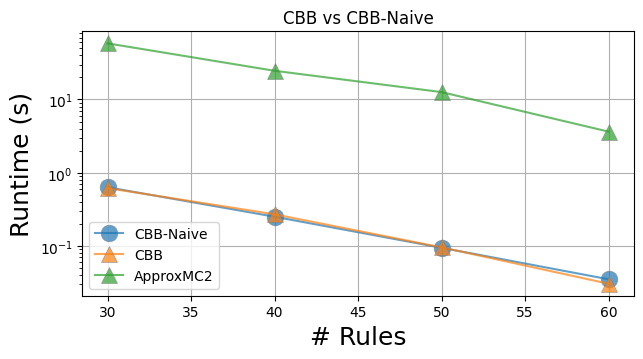

In [35]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

all_n_rules = [30, 40 , 50, 60]

plt.plot(all_n_rules, all_times_naive, label="CBB-Naive", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 
plt.plot(all_n_rules, all_times, label="CBB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 
plt.plot(all_n_rules, all_times_approx_mc2, label="ApproxMC2", marker = "^", linewidth=1.5 , color = colors[2],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 

plt.title("CBB vs CBB-Naive") 
plt.xlabel("# Rules", fontsize = 18)
plt.ylabel("Runtime (s)", fontsize = 18)
plt.legend()
plt.grid()
plt.tight_layout() 
plt.yscale("log")
plt.savefig("plots/comparison_naive_and_v2_compas_approx_mc_095" + ".pdf" )
plt.show()

In [31]:
X.shape

(721, 15)

In [26]:
all_times_approx_mc2

[52.43833923339844, 23.83001685142517, 13.522405624389648, 4.638275146484375]

In [51]:
all_n_rules = [187, 130, 98, 77, 61, 41]

In [57]:
all_times_naive

[5.775805234909058,
 2.221764087677002,
 0.5227937698364258,
 0.2820167541503906,
 0.12995338439941406,
 0.048909664154052734]

In [58]:
from bds.meel import approx_mc2

In [ ]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']


plt.plot(all_n_rules, all_times_naive, label="CBB-Naive", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 
plt.plot(all_n_rules, all_times, label="CBB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 
plt.plot(all_n_rules, all_times_approx_mc2rox_mc2rox_mc2rox_mc2, label="ApproxMC2", marker = "^", linewidth=1.5 , color = colors[2],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 


plt.title("CBB vs CBB-Naive") 
plt.xlabel("# Rules", fontsize = 18)
plt.ylabel("Runtime (s)", fontsize = 18)
plt.legend()
plt.grid()
plt.tight_layout() 
plt.yscale("log")
plt.savefig("plots/comparison_naive_and_v2_compas_approx_mc" + ".pdf" )
plt.show()

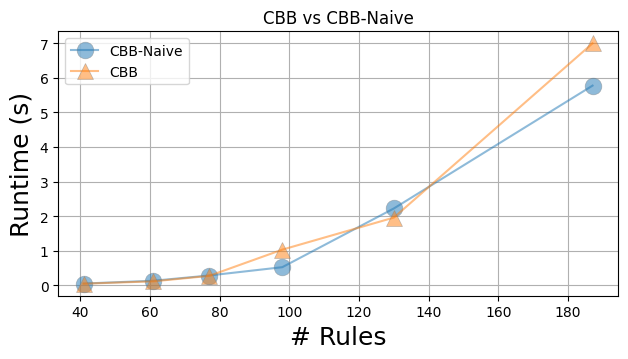

In [56]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']


plt.plot(all_n_rules, all_times_naive, label="CBB-Naive", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(all_n_rules, all_times, label="CBB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.title("CBB vs CBB-Naive") 
plt.xlabel("# Rules", fontsize = 18)
plt.ylabel("Runtime (s)", fontsize = 18)
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/comparison_naive_and_v2_compas" + ".pdf" )
plt.show()

In [55]:
all_times_naive

[5.775805234909058,
 2.221764087677002,
 0.5227937698364258,
 0.2820167541503906,
 0.12995338439941406,
 0.048909664154052734]

In [39]:
num_rules = len(rules) 

In [40]:
num_constraints = 5

In [41]:
rand_seed = 12

In [42]:
rand_seed = 12
num_constraints = 5
num_rules = len(rules) 
from bds.random_hash import generate_h_and_alpha
A, t = generate_h_and_alpha(
num_rules, num_constraints, rand_seed, as_numpy=True
)

In [43]:

actual_sols = solutions_to_dict(
list(cbb_v2.run(return_objective=True, A=A, t=t)))


[D 230620 16:20:40 cbb:160] setting up the parity constraint system
[D 230620 16:20:40 cbb:129] simplifying A x = t using rref
[D 230620 16:20:40 cbb:136] density(A_rref) = 49.639% (from 49.9%)


In [44]:
actual_sols

{(0, 49): 0.36629680998613035,
 (0, 7, 58): 0.3692094313453537,
 (0, 2, 7, 65): 0.38599167822468794,
 (0, 40, 52): 0.37614424410540914,
 (0, 2, 40, 68): 0.30000000000000004,
 (0, 40, 73): 0.25963938973647716,
 (0, 4, 40, 82): 0.3998613037447989,
 (0, 3, 12, 40): 0.3679611650485437,
 (0, 3, 20, 40): 0.38183079056865465,
 (0, 10, 40): 0.24438280166435508,
 (0, 4, 5, 40): 0.372122052704577,
 (0, 3, 28, 40): 0.3957004160887656,
 (0, 7, 8, 12): 0.38737864077669903,
 (0, 7, 8, 20): 0.3957004160887656,
 (0, 7, 13, 31): 0.3818307905686547,
 (0, 7, 18, 29): 0.3735090152565881,
 (0, 7, 24, 51): 0.34993065187239947,
 (0, 7, 29, 49): 0.3735090152565881,
 (0, 7, 29, 67): 0.3735090152565881,
 (0, 2, 24, 31, 40): 0.4,
 (0, 7, 31, 37): 0.39570041608876566,
 (0, 7, 31, 77): 0.3873786407766991,
 (0, 16, 31, 40): 0.30000000000000004,
 (0, 7, 36, 46): 0.3929264909847434,
 (0, 19, 36, 40): 0.30000000000000004,
 (0, 2, 8, 36, 40): 0.4,
 (0, 24, 40, 79): 0.30000000000000004,
 (0, 2, 13, 40, 51): 0.4,
 (0, 13

In [ ]:
all_times_naive = [] 
all_times_V0 = [] 
all_times_V1 = [] 
all_times_V2 = [] 
#
n_rep = 3 
#
lmbd = 0.1 
ub = 0.4
#
for _  in range(n_rep): 
    #
    start_time = time() 
    bbNaive = BranchAndBoundNaive(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbNaive.run(return_objective=True))
    all_times_naive.append(time() - start_time) 
    actualNaive = solutions_to_dict(feasible_solutions)
    #
    print("HLB done")
    #
    start_time = time() 
    bbV0 = BranchAndBoundV0(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV0.run(return_objective=True))
    all_times_V0.append(time() - start_time)
    actual_V0 = solutions_to_dict(feasible_solutions)
    #
    assert_dict_allclose(actual_V0, actualNaive)
    #
    print("RSSB done")
    #
    start_time = time() 
    bbV1 = BranchAndBoundV1(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV1.run(return_objective=True))
    all_times_V1.append(time() - start_time)
    actual_V1 = solutions_to_dict(feasible_solutions)
    #
    assert_dict_allclose(actual_V0, actual_V1)
    #
    print("EPLB + RSSB done")
    #
    start_time = time() 
    bbV2 = BranchAndBoundV2(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV2.run(return_objective=True))
    all_times_V2.append(time() - start_time)
    actual_V2 = solutions_to_dict(feasible_solutions)
    #
    assert_dict_allclose(actual_V1, actual_V2)
    #
    print("HLB + RSSB done")

In [ ]:
actual_V1

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']


x = [i for i in range(n_rep)]
plt.plot(x, all_times_naive, label="HLB", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(x, all_times_V0, label="RSSB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(x, all_times_V1, label="RSSB + EPLB",  marker = "s", linewidth=1.5 ,  color = colors[2],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(x, all_times_V2, label="RSSB + HLB",  marker = "P", linewidth=1.5 ,  color = colors[3],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.title("RSSB VS HLB VS RSSB + EPLB VS RSSB + HLB") 
plt.xlabel("Run", fontsize = 18)
plt.ylabel("Runtime", fontsize = 18)
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/first_comparison_bounds_compas" + ".pdf" )
plt.show()

When there are so few rule equivalent bounds seem to be useless. 

In [ ]:
for k in bbV1.equivalence_classes: 
    print(bbV1.equivalence_classes[k].data_points)
